#Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση. Μελέτη datasets του UCI Machine Learning Repository

**Ομάδα**: $\;\;\;$70 <br> **Φοιτητές**: Γιαννιός Γεώργιος Ταξιάρχης 031 16 156$\;\;\;\;\;\;\;\;\;\;\;\;\;$ Μπέτζελος Γιώργος 031 17 442  $\;\;\;\;\;\;\;\;\;\;\;\;\;$ Μπέτζελος Χρήστος 031 16 067 <br>**Datasets' Codes** : S06,B03

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install --upgrade matplotlib
!pip install --upgrade scipy
!pip install -U tensorflow
!pip install --upgrade imbalanced-learn
%matplotlib inline

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)
  Using cached numpy-1.19.4-cp36-cp36m-manylinux2010_x86_64.whl (14.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.1 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatib

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.4)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.3)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.5.4)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.1)
  Using cached numpy-1.18.5-cp36-cp36m-manylinux1_x86_64.whl (20.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

datascience 0.10.6 requires folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 req

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [1]:
import warnings 
warnings.filterwarnings('ignore')

import time
import itertools
import numpy as np
import pandas as pd
from operator import sub
from sklearn.svm import SVC
from sklearn import neighbors
from operator import itemgetter 
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_recall_fscore_support


#Small Dataset

Το **Small dataset** το οποίο αντιστοιχεί στην ομάδα μας (70) είναι το:  [JapaneseCreditScreening](https://archive.ics.uci.edu/ml/datasets/Japanese+Credit+Screening)


In [2]:
#Λήψη Dataset και Ανάγνωση σαν Dataframe

# Προσοοχή αν ΔΕ βάλουμε header = None, 
# θα θεωρήσει οτι η πρώτη γραμμή των δεδομένων είναι οι Περιγραφές των Χαρακτηριστικών
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## Χρήσιμες Πληροφορίες για Dataset

### 1 . Σύντομη παρουσίαση του dataset (τι περιγράφει)

Το συγκεκριμένο Dataset περιλαμβάνει κάποια χαρακτηριστικά (αριθμητικά και μη) ατόμων οι οποίοι είτε έλαβαν πίστωση απο μια Ιαπωνική Εταιρία,  είτε όχι.

### 2 . Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;


Τα **δείγματα** είναι συνολικά 690 και τα **χαρακτηριστικά** 15. Λόγω προσωπικών δεδομένων **δεν** παρέχεται κάποια πληροφορία σχετικά με το είδος των χαρακτηριστικών παρα μόνο οι διάφορες τιμές που αυτά λαμβάνουν.Πιο ειδικά για τα 15 γνωρίσματα έχουμε τις εξής τιμές:
<br>

0.   b, a.
1.   continuous.
2.   continuous.
3.   u, y, l, t.
4.   g, p, gg.
5.   c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
6.   v, h, bb, j, n, z, dd, ff, o.
7.   continuous.
8.   t, f.
9.  t, f.
10.	 continuous.
11.	 t, f.
12. g, p, s.
13.	continuous.
14.	continuous.
<br>
*(Πηγή: crx.names)*<br><br>


$\;\;\;\;\;\;$Να σημειωθεί, όπως αναγράφεται και στο αρχείο [crx.names](https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names)  "*All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data*" . Ωστόσο ανοίγοντας το αρχείο [credit.lisp](https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/credit.lisp) μπορούμε να αποκτήσουμε μια ιδέα ως προς το τι αντιπροσωπεύουν τα χαρακτηριστικά: Κατάσταση Εργασίας (Άνεργος ή όχι), αντικείμενο για το οποίο προορίζεται το δάνειο (αμάξι, έπιπλα, κόσμημα, υπολογιστής,ποδήλατο, stereo, κλπ), φύλο, κατάσταση γάμου, αν ζουν σε προβληματική περιοχή, Ηλικία, Καταθέσεις σε τράπεζα, Μισθός, Αναμενόμενος χρόνος που θα ξεπληρώσουν δάνειο, Χρόνια Εργασίας, κλπ. Αλλά και πάλι όπως τονίστηκε δεν έχουμε σαφή εικόνα λόγω εμπιστευτικότητας προσωπικών δεδομένων <br><br>.$\;\;\;\;\;\;$ Με βάση το **.lisp αρχείο**, μπορεί κανείς να πει τα ακόλουθα: 

*   Διατεταγμένα: Ηλικία, Καταθέσεις σε τράπεζα, Μισθός, αναμενόμενος χρόνος pay off, Χρόνια εργασίας 
*    Μη διατεταγμένα:Κατάσταση Εργασίας, αντικείμενο για το οποίο προορίζεται το δάνειο, φύλο, κατάσταση γάμου, αν ζουν σε προβληματική περιοχή<br><br>
Με βάση τώρα το **πεδίο τιμών** των παραπάνω γνωρισμάτων:


*   Διατεταγμένα:$\;\;\;\;$ 1, 2, 7, 10, 13, 14
*   Μη διατεταγμένα: 0, 3, 4, 5, 6, 8, 9, 11, 12








### 3 . Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών

Δεν παρέχονται **επικεφαλίδες** (feature names), λόγω εμπιστευτικόητας προσωπικών δεδομένων, αλλά ούτε και **αρίθμηση γραμμών** (κάθε γραμμή στο .data αρχείο έχει σαν πρώτο στοιχείο το 1ο χαρακτηριστικό και όχι κάποια αρίθμηση)
 

### 4 . Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται

Οι **ετικέτες** των κλάσεων, βρίσκονται στη τελευταία στήλη (**κολόνα 15**) και είναι δυό ("+", αν δώθηκε πίστωση, "-", αν όχι)

### 5 . Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες

$\;\;\;\;\;\;$ Αρχικά, επεξεργαζόμενοι το dataset παρατηρήσαμε ότι η $2^η$ και η $14^η$ κολόνα ενώ θα έπρεπε να είναι numeric ήταν stings. Γι αυτό κάναμε τις κατάλληλες μετατροπές.

In [3]:
# Εμφάνιση τύπων χαρακτηριστικών
print(df.dtypes)

# String to Float (if error -> np.nan)
df[1] = pd.to_numeric(df[1],errors='coerce')
df[13] = pd.to_numeric(df[13],errors='coerce')

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object


$\;\;\;\;\;\;$ Έπειτα, πραγματοποιήθηκε η αντιστοίχιση τιμών των ετικετών στο [0,1]. Επιπλέον, σιγουρεύμαστε ότι έχουμε το σωστό μέγεθος πινάκων χαρακτηριστικών και ετικετών.

In [4]:
#ΕΤΙΚΕΤΕΣ:
labels_df = df.iloc[:,15]                         # τα labels είναι στη 15η (τελευταία) κολώνα
print("Labels' values are: ", labels_df.unique()) # και είναι της μορφής [+,-]

# Μapping [+,-] στο [1,0] 
label_mapping = {'+': 1, '-': 0}
labels = labels_df.map(label_mapping)

print("Labels' values are after mapping: ", labels.unique()) # Εμφάνιση νέου τύπου ετικετών

print("Labels are total:",labels.shape[0])
print("")


#ΧΑΡΑΚΤΗΡΙΣΤΙΚΑ
print("Features of Samples:")
features = df.iloc[:,:15]
print(features)
print("(Samples,Features) are", features.shape)

Labels' values are:  ['+' '-']
Labels' values are after mapping:  [1 0]
Labels are total: 690

Features of Samples:
    0      1       2  3  4   5   6     7  8  9   10 11 12     13   14
0    b  30.83   0.000  u  g   w   v  1.25  t  t   1  f  g  202.0    0
1    a  58.67   4.460  u  g   q   h  3.04  t  t   6  f  g   43.0  560
2    a  24.50   0.500  u  g   q   h  1.50  t  f   0  f  g  280.0  824
3    b  27.83   1.540  u  g   w   v  3.75  t  t   5  t  g  100.0    3
4    b  20.17   5.625  u  g   w   v  1.71  t  f   0  f  s  120.0    0
..  ..    ...     ... .. ..  ..  ..   ... .. ..  .. .. ..    ...  ...
685  b  21.08  10.085  y  p   e   h  1.25  f  f   0  f  g  260.0    0
686  a  22.67   0.750  u  g   c   v  2.00  f  t   2  t  g  200.0  394
687  a  25.25  13.500  y  p  ff  ff  2.00  f  t   1  t  g  200.0    1
688  b  17.92   0.205  u  g  aa   v  0.04  f  f   0  f  g  280.0  750
689  b  35.00   3.375  u  g   c   h  8.29  f  f   0  t  g    0.0    0

[690 rows x 15 columns]
(Samples,Features) 

### 6 . Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;

$\;\;\;\;\;\;$Με μια γρήγορη ματία στο .data αρχείο παρατηρεί κανείς ότι κάποια χαρακτηριστικά δεν έχουν τιμές. Πιο ειδικά σε **37 δείγματα** παρατηρούνται μια ή περισσότερες **απουσιάζουσες τιμές**. Τα δείγματα αυτά αποτελούν το 5% των συνολοκών δειγμάτων.<br>Πηγή: [crx.names](https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names)<br>
$\;\;\;\;\;\;$Καθώς το ποσοστό των δειγμάτων με τιμές που απουσιάζουν είναι σχετικά μικρό (αλλά οχι <5% του συνόλου του dataset), **δεν** έχει νόημα να αφαιρέσουμε τα συγκεκριμένα δείγματα 


### 7 . Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.

Ο αριθμός των κλάσεων όπως προαναφέρθηκε είναι δύο:

*   "+": 307 (44.5%)
*   "-":$\;$383 (55.5%)
<br>$\;\;\;\;\;\;$Πηγή: [crx.names](https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names)
<br><br> Να σημειωθεί ότι είναι εξισσοροπημένο, οπότε δε θα χρειαστεί κάποια περαιτρέρω επεξεργασία ως προς αυτό.


### 8 . Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.

In [5]:
# Split our data
train, test, train_labels, test_labels = train_test_split(features.values, labels.values, test_size=0.20)

print("After split, shapes of arrays are:")
print("")
print("TrainData:", train.shape)
print("TrainLabels:",train_labels.shape[0])
print("TestData:",test.shape)
print("TestLabels:",test_labels.shape[0])

After split, shapes of arrays are:

TrainData: (552, 15)
TrainLabels: 552
TestData: (138, 15)
TestLabels: 138


#### Απουσιάζουσες τιμές

In [6]:
#Διαχωριζόμαστε ξεχωρίστά τις τιμές string και numeric

#string_data  : Εφαρμόόζουμε τη τακτική most_frequent
#numeric_data : Εφαρμόόζουμε τη τακτική mean


def missing_values(train_df, test_df, columns, strat):


  ### TrainDataset:
  
  #Eπιλογή των Επιθυμητών Στηλών απο TrainDataset 
  train_df_part = train_df[columns]

  #Αντικατάσταση "?,nan" σε np.NaN
  train_df_part.replace('?',np.NaN,inplace=True)
  train_df_part.replace('nan',np.NaN,inplace=True)

  #Εφαρμογή Στρατηγικής ("mean" or "most_freq")  
  imp=SimpleImputer(missing_values=np.NaN,strategy= strat)
  idf_part=pd.DataFrame(imp.fit_transform(train_df_part))

  idf_part.columns = train_df_part.columns
  idf_part.index   = train_df_part.index

  ### Test Dataset:

  #Aντιγραφή Aπουσιάζουσων τιμών απο Train Dataset  

  #Eπιλογή των Επιθυμητών Στηλών απο TestDataset 
  test_df_part = test_df[columns]

  #Αντικατάσταση "?,nan" σε np.NaN
  test_df_part.replace('?',np.NaN,inplace=True)
  test_df_part.replace('nan',np.NaN,inplace=True)

  #Αντιγραφή τιμών απο Train στο Test
  imputed_test_data_part = imp.transform(test_df_part.values)


  return idf_part,imputed_test_data_part

In [7]:
Train_df = pd.DataFrame(train)
Test_df = pd.DataFrame(test)

numeric_columns = [1,2,7,10,13,14]
string_columns = [0,3,4,5,6,8,9,11,12]

#Eφαρμογή διαφορετικής τεχνικής σε numeric - string data:
train_numeric,test_numeric = missing_values(Train_df, Test_df, numeric_columns, 'mean')
train_string,  test_string  = missing_values(Train_df, Test_df, string_columns , 'most_frequent')


print("")
print("NumericData:")
print("Train:",train_numeric.shape)
print("Test:",test_numeric.shape)

print("")
print("StringData:")
print("Train:",train_string.shape)
print("Test:",test_string.shape)

#Συνένωση των πινάκων 

train_pros = np.concatenate((train_string, train_numeric), axis=1)
test_pros  = np.concatenate((test_string, test_numeric), axis=1)

print("")
print("Aftrer Concathenation:")


print("Train:",train_pros.shape)
print("Test:",test_pros.shape)



NumericData:
Train: (552, 6)
Test: (138, 6)

StringData:
Train: (552, 9)
Test: (138, 9)

Aftrer Concathenation:
Train: (552, 15)
Test: (138, 15)


#### Διατεταγμένα Χαρακτηριστικά

In [8]:
#Συνάρτηση που μετατρέπει τις στήλες col ενός dataset 
#με μη διατεταγμένα χαρακτηριστικά, σε vectors.
 
def string_code (dataset,col):
  mtdf = pd.DataFrame(dataset)
  # οι κολόνες 0 μέχρι 8 έχουν κατηγορικές μεταβλητές. 
  # Με την "get_dummies" κάνουμε τη μετατροπή σε binary χαρακτηριστικά που περιγράψαμε
  dummies = pd.get_dummies(mtdf, columns = col)
  # Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
  coded_dataset = dummies.apply(pd.to_numeric)

  return coded_dataset

In [9]:
#Train
columns = [0,1,2,3,4,5,6,7,8]
train=string_code(train_pros,columns)
print(train)

         9      10      11    12     13     14  ...  6_t  7_f  7_t  8_g  8_p  8_s
0    43.00   0.290   1.750   8.0  100.0  375.0  ...    1    1    0    1    0    0
1    24.42  12.335   1.585   0.0  120.0    0.0  ...    0    0    1    1    0    0
2    58.58   2.710   2.415   0.0  320.0    0.0  ...    0    0    1    1    0    0
3    27.25   1.665   5.085   9.0  399.0  827.0  ...    1    1    0    1    0    0
4    18.92   9.000   0.750   2.0   88.0  591.0  ...    1    1    0    1    0    0
..     ...     ...     ...   ...    ...    ...  ...  ...  ...  ...  ...  ...  ...
547  22.08  11.000   0.665   0.0  100.0    0.0  ...    0    1    0    1    0    0
548  21.83   1.540   0.085   0.0  356.0    0.0  ...    0    0    1    1    0    0
549  32.75   1.500   5.500   3.0    0.0    0.0  ...    1    0    1    1    0    0
550  30.67  12.000   2.000   1.0  220.0   19.0  ...    1    1    0    1    0    0
551  54.58   9.415  14.415  11.0   30.0  300.0  ...    1    0    1    1    0    0

[552 rows x 46 

In [10]:
#Test
columns = [0,1,2,3,4,5,6,7,8]
test = string_code(test_pros,columns)
print(test)

         9     10     11    12     13       14  ...  6_t  7_f  7_t  8_g  8_p  8_s
0    30.17  6.500  3.125   8.0  330.0   1200.0  ...    1    1    0    1    0    0
1    23.08  0.000  1.000  11.0    0.0      0.0  ...    1    1    0    0    0    1
2    25.50  0.375  0.250   3.0  260.0  15108.0  ...    1    1    0    1    0    0
3    19.67  0.375  2.000   2.0   80.0      0.0  ...    1    0    1    1    0    0
4    30.33  0.500  0.085   0.0  252.0      0.0  ...    0    0    1    0    0    1
..     ...    ...    ...   ...    ...      ...  ...  ...  ...  ...  ...  ...  ...
133  25.17  6.000  1.000   3.0    0.0      0.0  ...    1    1    0    1    0    0
134  41.17  4.040  7.000   8.0  320.0      0.0  ...    1    1    0    1    0    0
135  16.50  0.125  0.165   0.0  132.0      0.0  ...    0    1    0    1    0    0
136  52.50  6.500  6.290  15.0    0.0  11202.0  ...    1    1    0    1    0    0
137  22.92  3.165  0.165   0.0  160.0   1058.0  ...    0    1    0    1    0    0

[138 rows x 42 

In [11]:
#Πρόβλημα: Παρατηρούμε ότι στα δεδομένα Test δεν βρέθηκαν όλοι οι 
#χαρακτήρες που κωδικοποιήθηκαν στο Train, με αποτέλεσμα
#οι στήλες του test να είναι λιγότερες (!)

print("Χαρακτηριαστικά μετά την κωδικοποίηση σε test:")
print(test.columns.values)
print("Χαρακτηριαστικά μετά την κωδικοποίηση σε train:")
print(train.columns.values)


Χαρακτηριαστικά μετά την κωδικοποίηση σε test:
[9 10 11 12 13 14 '0_a' '0_b' '1_u' '1_y' '2_g' '2_p' '3_aa' '3_c' '3_cc'
 '3_d' '3_e' '3_ff' '3_i' '3_j' '3_k' '3_m' '3_q' '3_w' '3_x' '4_bb'
 '4_dd' '4_ff' '4_h' '4_j' '4_n' '4_v' '4_z' '5_f' '5_t' '6_f' '6_t' '7_f'
 '7_t' '8_g' '8_p' '8_s']
Χαρακτηριαστικά μετά την κωδικοποίηση σε train:
[9 10 11 12 13 14 '0_a' '0_b' '1_l' '1_u' '1_y' '2_g' '2_gg' '2_p' '3_aa'
 '3_c' '3_cc' '3_d' '3_e' '3_ff' '3_i' '3_j' '3_k' '3_m' '3_q' '3_r' '3_w'
 '3_x' '4_bb' '4_dd' '4_ff' '4_h' '4_j' '4_n' '4_o' '4_v' '4_z' '5_f'
 '5_t' '6_f' '6_t' '7_f' '7_t' '8_g' '8_p' '8_s']


In [12]:
#Λύση: Zero padding σε στήλες του πίνακα train στις σωστές θέσεις 

def zero_padding_to_columns(train,test):
  index = 0
  diff=[]

  #Διέτρεξε όλες τις στήλες με χαρακηριστικά του Train
  for i in train.columns.values:
    #Αν δεν βρεις τη στήλη στο test,
    #αποθήκευσε το όνομά της και το που τη βρήκες στο Train 
    if i not in test.columns.values:
      diff.append((index, i))
    index =index +1

  # Τοποθέτηση της μηδενικής στύλης στην κατάλληλη θέση του Test
  for i in diff:
    test.insert(i[0], i[1], np.zeros(138), True)
  
  return test


In [13]:
test = zero_padding_to_columns(train,test)

train = train.values
test = test.values

print("Train shape is",train.shape)
print("After Padding, Test shape is",test.shape)

Train shape is (552, 46)
After Padding, Test shape is (138, 46)


## Ταξινόμηση


*   **Ταξινομητές**: dummy, Gaussian Naive Bayes, kΝΝ
*   **Data split**: 20% για test set και σχήμα 10-fold για cross-validation
*   **Μετρικές Απόδοσης(cv)**:f1_micro, f1_macro






## Baseline classification


### 1 . Διαχειριστείτε τυχόν απουσιάζουσες τιμές. Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.

Πηγή: [Confusion matrix *Scikit learn*](https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html) 

In [14]:
# Συνάρτηση για figure του confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    print('iii) Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [15]:
# Συνάρτηση για εμφάνιση μετρικών κάποιου ταξινομητή
def baseline_classification (clf,train,train_labels,test,test_labels):
  
  start_time = time.time()

  #Εκπαίδευση Ταξινομητή
  clf.fit(train,train_labels)
  #Προβλέψεις
  preds = clf.predict(test)

  time_passed = time.time() - start_time
  global classifier_number

  print(classifier_number,clf)
  print("i)  time =",round(time_passed,4),"sec")
  classifier_number = classifier_number+1

  acc = clf.score(test,test_labels)

  accuracy = round(100*acc)
  print("ii) acc =",accuracy,"%")

  #Οι (μοναδικές) ετικέτες είναι:
  #
  uni_labels = np.unique(train_labels)
  uni_labels = uni_labels.tolist()

  #Confusion matrix
  cnf_matrix = confusion_matrix(test_labels, preds)
  plot_confusion_matrix(cnf_matrix,uni_labels)
  print("")
  #f1-micro average
  p_micro,r_micro,f1_micro,_ = precision_recall_fscore_support(test_labels, preds, average='micro')
  print("iv) fi_micro =",f1_micro*100,"%")
  #f1-macro average
  p_macro,r_macro,f1_macro,_ = precision_recall_fscore_support(test_labels, preds, average='macro')
  print("v) fi_macro  =",f1_macro*100,"%")
  print("")

  return (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),(time_passed,accuracy)


1 DummyClassifier(constant=None, random_state=None, strategy='uniform')
i)  time = 0.0004 sec
ii) acc = 51.0 %
iii) Confusion matrix, without normalization


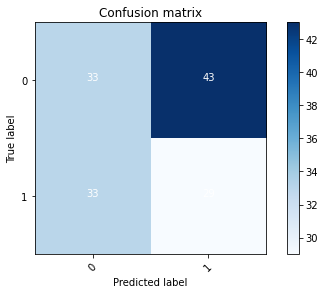


iv) fi_micro = 44.927536231884055 %
v) fi_macro  = 44.881227664494425 %

2 DummyClassifier(constant=0, random_state=None, strategy='constant')
i)  time = 0.0004 sec
ii) acc = 55.0 %
iii) Confusion matrix, without normalization


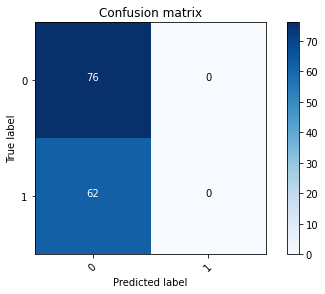


iv) fi_micro = 55.072463768115945 %
v) fi_macro  = 35.51401869158878 %

3 DummyClassifier(constant=1, random_state=None, strategy='constant')
i)  time = 0.001 sec
ii) acc = 45.0 %
iii) Confusion matrix, without normalization


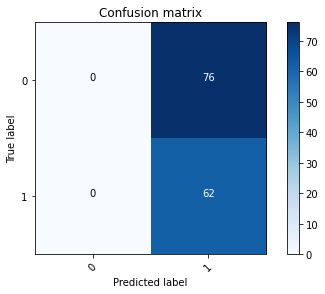


iv) fi_micro = 44.927536231884055 %
v) fi_macro  = 31.0 %

4 DummyClassifier(constant=None, random_state=None, strategy='most_frequent')
i)  time = 0.0004 sec
ii) acc = 55.0 %
iii) Confusion matrix, without normalization


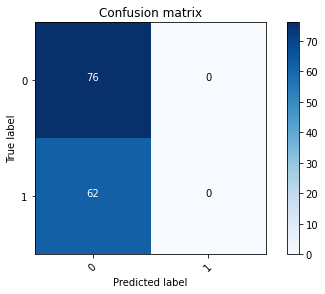


iv) fi_micro = 55.072463768115945 %
v) fi_macro  = 35.51401869158878 %

5 DummyClassifier(constant=None, random_state=None, strategy='stratified')
i)  time = 0.0004 sec
ii) acc = 51.0 %
iii) Confusion matrix, without normalization


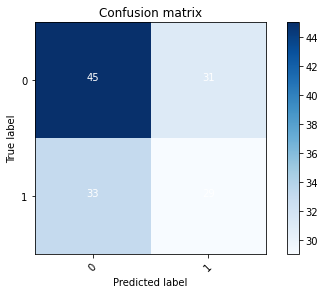


iv) fi_micro = 53.62318840579711 %
v) fi_macro  = 52.99127102405791 %

6 GaussianNB(priors=None, var_smoothing=1e-09)
i)  time = 0.0021 sec
ii) acc = 88.0 %
iii) Confusion matrix, without normalization


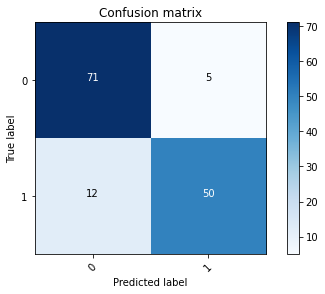


iv) fi_micro = 87.68115942028986 %
v) fi_macro  = 87.3891307853572 %

7 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
i)  time = 0.0085 sec
ii) acc = 67.0 %
iii) Confusion matrix, without normalization


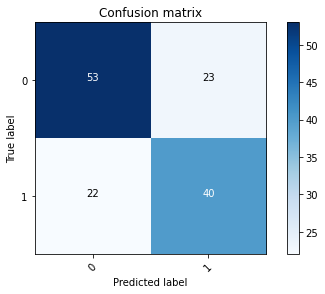


iv) fi_micro = 67.3913043478261 %
v) fi_macro  = 67.09933774834438 %



In [16]:
#ΟΡΙΣΜΟΣ ΤΑΞΙΝΟΜΗΤΩΝ 

## Dummy
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0  = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

#Gaussian Naive Bayes
gnb = GaussianNB()

#kNN
kNN = neighbors.KNeighborsClassifier()

classifiers  = [dc_uniform,dc_constant_0,dc_constant_1,dc_most_frequent,dc_stratified,gnb,kNN]

#Λίστες στις οποίες θα αποθηκέυσουμε τις μετρικές μας 
#μετά την εκπαίδευση των ταξινομητών

p_micro_list = []
r_micro_list = []
f1_micro_list = []

p_macro_list = []
r_macro_list = []
f1_macro_list = []

time_list = []
accuracy_list = []


classifier_number= 1

#Εκπαίδευση Ταξινομητών, Εξαγωγή Μετρικών, Εισαγωγή σε Λίστες
for clf in classifiers:
  (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),(time_passed,accuracy) = baseline_classification(clf,train,train_labels,test,test_labels)
  
  p_micro_list.append(p_micro)
  p_macro_list.append(p_macro)
  
  r_micro_list.append(r_micro)
  r_macro_list.append(r_macro)

  f1_micro_list.append(f1_micro)
  f1_macro_list.append(f1_macro)

  time_list.append(time_passed)

  accuracy_list.append(accuracy)

### 2 . Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.

In [17]:
# Συνάρτηση για bar plots
def plots_for_classification(data,colors,title):

  number_of_classifiers = len(data[0])
  X = np.arange(number_of_classifiers)
  fig = plt.figure(figsize=(10, 6))
  ax = fig.add_axes([0,0,1,1])
  ax.bar(X - 0.15, data[0], color = colors[0], width = 0.3)
  ax.bar(X + 0.15, data[1], color = colors[1], width = 0.3)
  if (number_of_classifiers==7):
    plt.xticks(X,['dummy\nuniform','dummy\nconstant_0','dummy\nconstant_1','dummy\nmost_frequent','dummy\nstratified','GNB','kNN\nbaseline'],fontsize = 14)
  elif (number_of_classifiers==8):
    plt.xticks(X,['dummy\nuniform','dummy\nconstant_0','dummy\nconstant_1','dummy\nmost_frequent','dummy\nstratified','GNB','kNN\nbaseline','kNN\noptimized'],fontsize = 14)
  elif (number_of_classifiers==13):
    plt.xticks(X,['dummy\nuniform','dummy\nconstant_1','dummy\nconstant_2','dummy\nconstant_3','dummy\nconstant_4','dummy\nconstant_5','dummy\nconstant_7','dummy\nmost_frequent','dummy\nstratified','GNB','kNN\nbaseline','MLP\nbaseline','SVM\nbaseline'],fontsize = 14,rotation = 60)

  ax.legend(labels=['micro', 'macro'])
  ax.set_title(title,fontsize = 21)


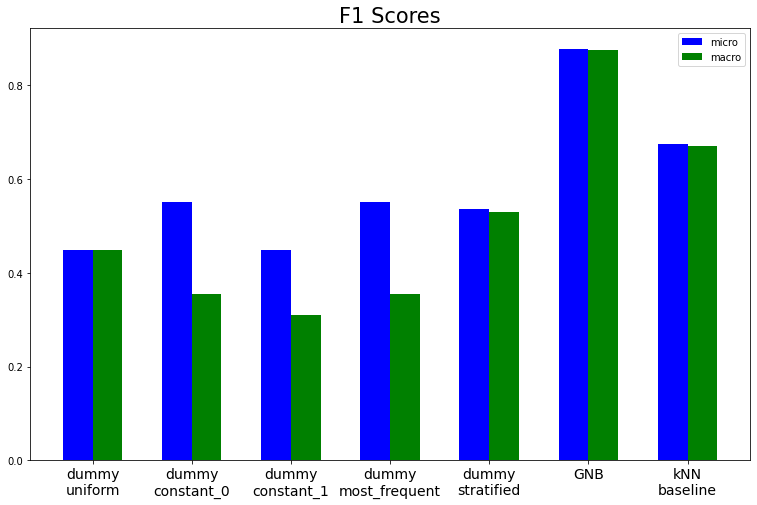

In [18]:
plots_for_classification([f1_micro_list,f1_macro_list],['b', 'g'],'F1 Scores')

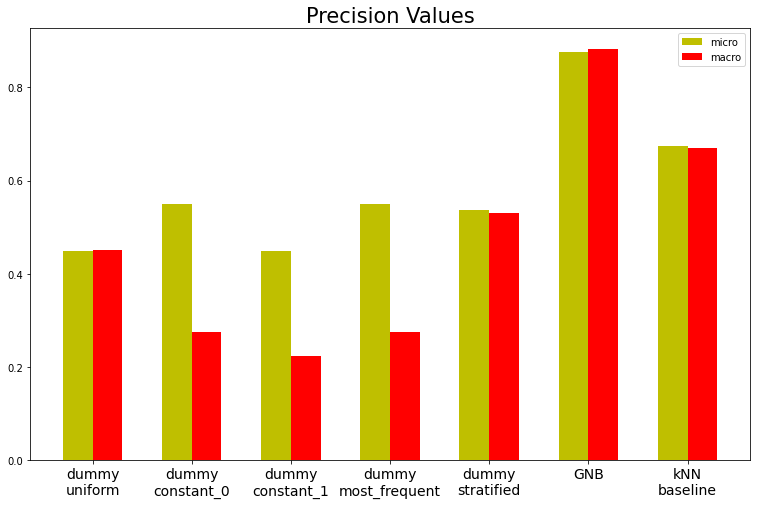

In [19]:
plots_for_classification([p_micro_list,p_macro_list],['y', 'r'],'Precision Values')

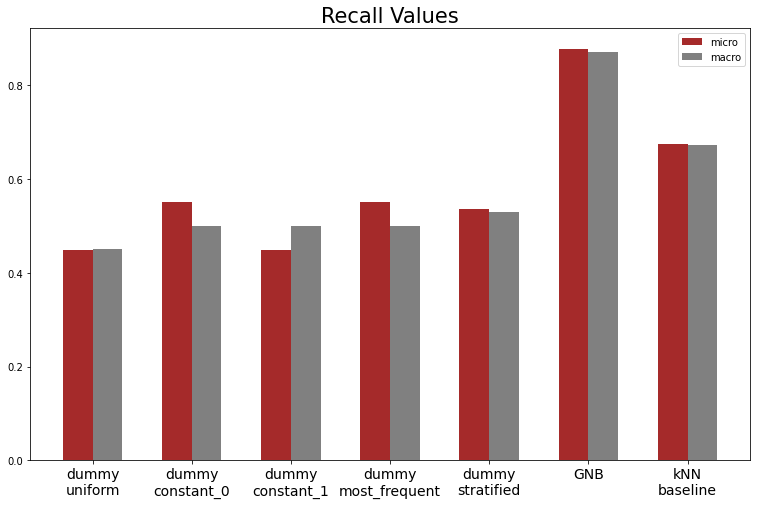

In [20]:
plots_for_classification([r_micro_list,r_macro_list],['brown', 'gray'],'Recall Values')

### 3 . Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης.



*   **Plots**: Στην παραπάνω ανάλυση χρησιμοποιήσαμε,όπως φαίνεται και απο τα plots, dummy classifiers. Απώτερος σκοπός αυτής της ανάλυσης, ήταν να δούμε αν οι δυο ταξινομητές μας (Knn & GNB), αποδίδουν καλύτερα απο αυτούς για το ίδιο Dataset.(Κάθε αναλυτική προσέγγιση για ένα πρόβλημα ταξινόμησης θα πρέπει να υπερτερεί μεθόδων που βασίζονται απλά σε μια τυχαία διαδικασία). Η παραπάνω "φιλοσοφία" αποτωπώθηκε σε όλα τα plots (τόσο ως προς precision οσο και ως προς recall και f1). Αναλυτικά παρακάτω:
<br>
*   **Precision,Recall**: Στη συνέχεια μελετήσαμε τη τιμή του Presicion που στην ουσία υποδήλωνε το εξής: Αναφορικά με τις προβλέψεις για τη κλάση 0 (να μην δοθεί δάνειο), πόσες ανταποκρινόντουσαν στη πραγματικότητα (ήταν "0" και όχι "1"). Ταυτόχρονα, σχολιάστηκε και τη τιμή Recall που υποδήλωνε το εξής: Aναφορικά με τη κλάση 0 (δεν δόθηκε δάνειο), πόσες προβλέψεις ήταν σύμφωνες με αυτό (ήταν "0" και όχι "1") <br>$\;\;\;\;\;\;$Αξίζει να σταθεί κανείς στο γεγονός οτι απο τους δύο dummy (constant0 & constant1), μπορεί κανείς να συμπεράνει την μικρή υπεροχή των δειγμάτων "0" έναντι του "1".Μάλιστα τα Precision,Recall του dummy constant 0 είναι ίδιο με του most_frequent για τον ίδιο λόγο. Τέλος παρατηρείται ότι dummy uniform και dummy_stratified, έχουν ίδιες τιμές Precision αλλά και Recall αφου και οι δύο κάνουν προβλέψεις σεβόμενοι την κατανομή των ετικετών. Εν γένει διαφέρουν, αλλά στο ισσοροπημεο Dataset που διαθέτουμε, κάνουν παρόμοιες προβλέψεις.
<br>$\;\;\;\;\;\;$Τέλος ο GNB,  αποδίδει καλά ως προς precision και recall ενώ ο knn επισημαίνει την ανάγκη βελτιστοποίησης των υπερπαραμέτρων του.
*   **f1**: Είδαμε παραπάνω οτι μπορεί να καταλήξαμε σε κάποια κοινά συμπεράσματα μελετώντας precision,recall ταυτόχρονα, ωστόσο όμως τα επιμέρους αποτελέσματα δεν παύουν να είναι διαφορετικά. Άλλωστε ας μην ξεχνάμε το trade off μεταξύ των δυο αυτών εννοιών. Για το λόγο αυτό μελετήσαμε και την απόδοση ως προς μετρική f1 (micro & macro). Να σημειωθεί στο σημείο αυτό ότι χρησιμοποιώντας στρατηγική macro, οι μετρικές υπολογίζονται ανεξάρτητα και στη συνέχεια υπολογίζεται μια μέση τιμή, ενω χρησιμοποιώντας τη τεχνική micro, λαμβάνονται υπόψιν η κατανομή των κλάσεων. Στην περίπτωση μας, όπου το dataset είναι ισορροποπημένο παρατηρούμε παρόμοιες τιμές micro - macro για όλους τους ταξινομητές μας εκτος απο dummy_contant και most_frequent προφανως.  
*   **Πίνακες Σύγχησης**:Απο τους πίνακες σύγχησης εξάγονται όλες οι παραπάνω μετρικές, οι οποίες σχολιάστηκαν. Αξιζεί κανείς να σταθεί στο γεγονός γιατί μελετάμε μετρική f1 και όχι accuracy. Στο Dataset μας, κρίσιμες τιμές δεν αποτελούν τόσο τα TP,TN αλλά κυρίως τα FP,FN (περιπτώσεις όπου το μοντέλο μας προέβλεψε οτι καλο ειναι να μη δοθει δάνειο, ενώ στη πραγματικότητα έπρεπε ή το μοντέλο μας προέβλεψε να δοθεί δάνειο ενώ στη πραγματικότητα δεν έπρεπε). Απο την άλλη όμως και το accuracy θα ήταν μια καλή μετρική μιας και το dataset είναι ισσοροπημένο, όπως προαναφέρθηκε.






## Βελτιστοποίηση Ταξινομητών

### 1 . Για κάθε ταξινομητή βελτιστοποιήστε την απόδοσή του στο training set μέσω της διαδικασίας προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (δεν έχουν όλοι οι ταξινομητές υπερπαραμέτρους). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average. 


In [21]:
# Συνάρτηση βελτιστoπoίησης knn μέσω Grid Search και επιστροφή μετρικών με βάση μετρική απόδοσης (micro or macro)
def knn_optimization (score):
  pipe = Pipeline(steps=[('selector', selector), 
                         ('scaler', scaler), 
                         ('sampler', ros), 
                         ('pca', pca), 
                         ('kNN', clf)], memory = 'tmp')
  
  estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, 
                                      pca__n_components=n_components, 
                                      kNN__n_neighbors=k), cv=10, scoring=score, n_jobs=-1)
  
  #print(estimator.best_params_)
  #print("")
 
  #Έναρξη Χρόνου Εκπαίδευσης
  start_time = time.time()
  estimator.fit(train, train_labels)
  #Λήξη Χρόνου Εκπαίδευσης
  time_f1 = time.time() - start_time
  
  #Εκτύπωση πίνακα Σύγχυσης
  preds = estimator.predict(test)
  cnf_matrix = confusion_matrix(test_labels, preds)
  plot_confusion_matrix(cnf_matrix,['+','-'])
  print("")

  
  #Επιστροφή Μετρικών
  accuracy = round(100*estimator.score(test, test_labels))

  p_micro,r_micro,f1_micro,_ = precision_recall_fscore_support(test_labels, preds, average='micro')
  p_macro,r_macro,f1_macro,_ = precision_recall_fscore_support(test_labels, preds, average='macro')

  print("fi_micro average is:",round(100*f1_micro),"%")
  print("fi_macro average is:",round(100*f1_macro),"%")

  return (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1,accuracy


In [22]:
# Αρχικά μελετάμε το variance των μεταβλητών για τη variance threshold
train_variance = train.var(axis=0)
print(train_variance)
print("Max value of variance is",np.max(train_variance))

[1.39258514e+02 2.41813114e+01 1.13280878e+01 2.56795710e+01
 3.00347333e+04 2.70908954e+07 2.09564036e-01 2.09564036e-01
 3.61006091e-03 1.82888968e-01 1.80998608e-01 1.82888968e-01
 3.61006091e-03 1.80998608e-01 7.02977316e-02 1.65984037e-01
 5.46103760e-02 3.49191346e-02 3.65961720e-02 7.48759452e-02
 7.63888889e-02 1.25203476e-02 6.87585329e-02 5.46103760e-02
 9.82953949e-02 5.40524575e-03 8.67957099e-02 5.62086484e-02
 7.63888889e-02 8.97592418e-03 7.93950851e-02 1.60650992e-01
 1.07514178e-02 5.40524575e-03 3.61006091e-03 2.42120222e-01
 1.07514178e-02 2.49051539e-01 2.49051539e-01 2.43646293e-01
 2.43646293e-01 2.48411573e-01 2.48411573e-01 8.67957099e-02
 1.25203476e-02 7.63888889e-02]
Max value of variance is 27090895.40437934


In [23]:
# Η μέγιστη τιμή της διασποράς υπολογίστηκε ίση με 27923021.59593245
# Ωστόσο παρατηρήσαμε ότι δεν είχε νόημα να αναζητήσουμε τιμές εκει "κοντά"
# καθώς όπως και βλέπουμε και στον παραπάνω πίνακα οι τιμές κυμαίνονται 
# στο έυρος τιμών με τάξη μεγέθους e-02

vthreshold = [0, 0.01, 0.05, 0.1, 0.15, 0.2]     #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [14, 15, 16, 17, 19, 21]          #Το πλήθος των κύριων συνιστωσών PCA που κρατήσαμε
k = [31, 33, 35, 37, 39, 41]                     # η υπερπαράμετρος του ταξινομητή

#### α)f1 micro

iii) Confusion matrix, without normalization


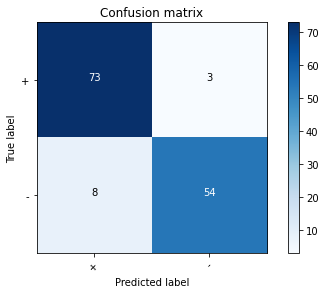


fi_micro average is: 92.0 %
fi_macro average is: 92.0 %


In [24]:
#Oρισμός Ταξινομητή
clf = neighbors.KNeighborsClassifier(n_jobs=-1)

#Oρισμός Μετασχηματιστών
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

# Βελτιστοποίηση με βάση το f1_micro
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = knn_optimization ('f1_micro')

# Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
time_list.append(time_f1_micro)

# Προσθήκη απόδοσης στη λίστα μας
accuracy_list.append(accuracy_f1_micro)


#### β)f1 macro

iii) Confusion matrix, without normalization


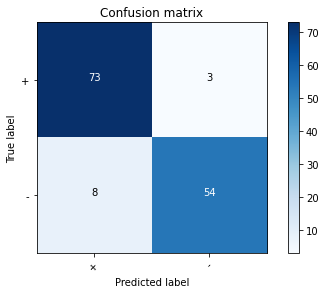


fi_micro average is: 92.0 %
fi_macro average is: 92.0 %


In [25]:
#Oρισμός Ταξινομητή
clf = neighbors.KNeighborsClassifier(n_jobs=-1)

#Oρισμός Μετασχηματιστών
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

# Βελτιστοποίηση με βάση το f1_macro
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_macro,accuracy_f1_macro = knn_optimization ('f1_macro')

# Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
time_list.append(time_f1_macro)

# Προσθήκη απόδοσης στη λίστα μας
accuracy_list.append(accuracy_f1_macro)

#### **Σχόλια για βελτιστοποίηση kNN με PipeLine και GridSearch**
Παρατηρούμε ότι μετά τη βελτιστοποίηση οι τιμές f1 micro - f1 macro, αυξήθηκαν αισθητά (σε σχέση με baseline).Η μέθοδος που ακολουθήσαμε ήταν top-down. (Ξεκινήσαμε με όλους τους μετασχηματιστές, και καταγράψαμε τις επιπτώσεις απο την αφαίρεσή τους). Ορισμένα στάδια προεπεξεργασίας και οι τιμές των υπερπαραμέτρων που εξετάσαμε με την διαδικασία βελτιστοποίησης στο GridSearch είναι οι εξής:

*   **StandardScaler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Standard Scaler για την κανονικοποίηση των χαρακτηριστικών.

*   **RandomOverSampler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Random Over Sampler για την πλήρη εξισορρόπηση του  dataset. Παρατηρήσαμε οτι χωρίς την παρουσία του συγκεκριμένου μετασχηματιστή, οι μετρικές f1_micro ή f1_macro παρουσίαζαν ενίοτε μικρή πτώση.

*   **vthreshold**: Η μέγιστη τιμή της διασποράς υπολογίστηκε περίπου  ίση με 2e8 . Ωστόσο παρατηρήσαμε ότι δεν είχε νόημα να αναζητήσουμε τιμές εκει "κοντά", καθώς όπως είδαμε απο τον πίνακα με όλες τις διασπορές των χαρακτηριστικών, οι τιμές κυμαίνονται στο έυρος τιμών με τάξη μεγέθους e-02. Οπότε εστιάσαμε στην περιοχή αυτή. Η βέλιστη τιμή που επιλέχτηκε δεν ήταν άκρο κλειστού διαστήματος, οπότε δε προχωρήσαμε σε περαιτέρω αναζήτηση.

*   **n_components**: Για το πλήθος των κύριων συνιστωσών PCA που κρατάμε, δοκιμάσαμε αρχικά διάφορες τιμές στην περιοχή [1 - n_features_new] . Να σημειωθεί οτι μετά την διαχείριση των μη διατετεταγμένων χαρακτηριστικών, τα features που προέκυψαν ήταν 46 στον αριθμό. Αναζητώντας τιμές στο διάστημα αυτο, το βέλτιστο αποτέλεσμα ήταν το 14.

*   **k_neighbors**: Για το πλήθος των γειτόνων του kNN ταξινομητή, δοκιμάσαμε αρκετές τιμές αρχικά σε μεγάλο εύρος και στη συνέχεια σε μικρότερο, οπότε τελικά καταλήξαμε στην βέλτιστη τιμή 31. Αρκετά μεγάλη, αλλά πιστώνει έγκυρο αποτέλεσμα.


Να σημειωθεί ότι, δοκιμάζοντας να απαλείψουμε τις απουσάζουσες τιμές και κανονικοιποιώντας τα δείγματα με τη μέθοδο (min- max), σύμφωνα με τις υποδείξεις του [paper](https://pdfs.semanticscholar.org/3bd9/7643d6c4c5466edd270acb87f1d581c9c27d.pdf), δεν καταφέραμε να πετύχουμε ποσοστο επιτυχίας πάνω απο 93%. Επίσης μπορεί σε κάποια εκτέλεση (είτε με αποκοπή, είτε με διαχείριση απουσιαζουσών μεταβλητών), να πετύχαμε μικρότερο ποσοστο επιτυχίας(στο διάστημα 85 - 89 %). Άς μην ξεχνάμε τη τυχαιότητα τόσο στο αρχικό split, όσο και στα folds του cv.


### 2 . Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set εκτυπώστε πίνακες με τους χρόνους εκτέλεσης.

In [26]:
df_list = [['dummy uniform','dummy constant_0','dummy constant_1','dummy most_frequent','dummy stratified','GNB','kNN baseline','kNN optimized by f1_micro','kNN optimized by f1_macro'],time_list]

df = pd.DataFrame (df_list).transpose()
df.columns = ['Classifiers','Time(s)']

HTML(df.to_html(index=False))

Classifiers,Time(s)
dummy uniform,0.000420809
dummy constant_0,0.000366688
dummy constant_1,0.00100017
dummy most_frequent,0.000374556
dummy stratified,0.000417471
GNB,0.00205278
kNN baseline,0.00845623
kNN optimized by f1_micro,115.326
kNN optimized by f1_macro,111.998


### 3 . Για κάθε averaged metric, εκτυπώστε bar plot σύγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.

$\;\;\;\;\;\;$Παρατηρήσαμε οτι, παρόλο που χρησιμοποιήσαμε δυο διαφορετικές μετρικές (f1_micro,f1_macro), καταλήξαμε **στο ίδιο μοντέλο**.Άλλωστε αυτό ήταν αναμενόμενο, αφού το dataset ήταν ισορροπημένο, οπότε ήταν το ίδιο αν μελετούσαμε ξεχωριστά κάθε κλάση και μετά μέση τιμή (macro), ή λαμβάναμε υπόψιν την κατανομή των κλάσεων (micro). Για το λόγο αυτό στα παρακάτω διαγράμματα παρουσίάζουμε τις τιμές f1 (micro-macro) **ενός** μοντέλου, σε αντιπαραβολή με τους προηγούμενους classifiers.

In [27]:
if (len(f1_micro_list) == 7) :
  f1_micro_list.append(f1_micro)
  f1_macro_list.append(f1_macro)

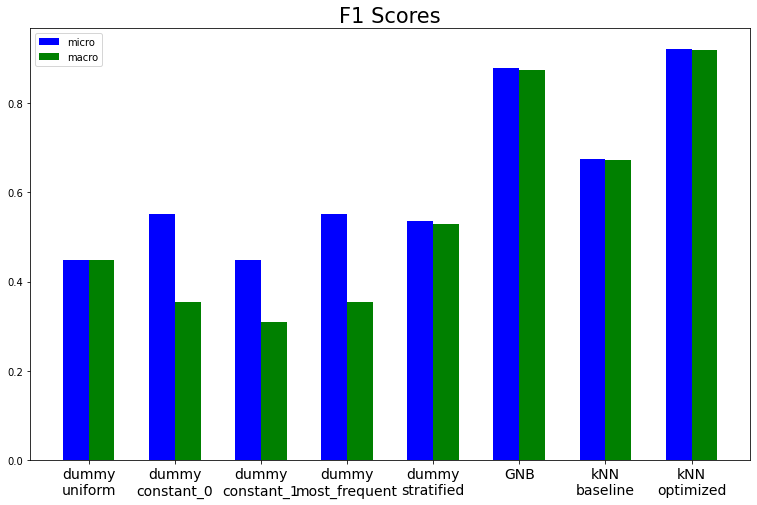

In [28]:
plots_for_classification([f1_micro_list,f1_macro_list],['b', 'g'],'F1 Scores')

In [29]:
if (len(p_micro_list) == 7) :
  p_micro_list.append(p_micro)
  p_macro_list.append(p_macro)

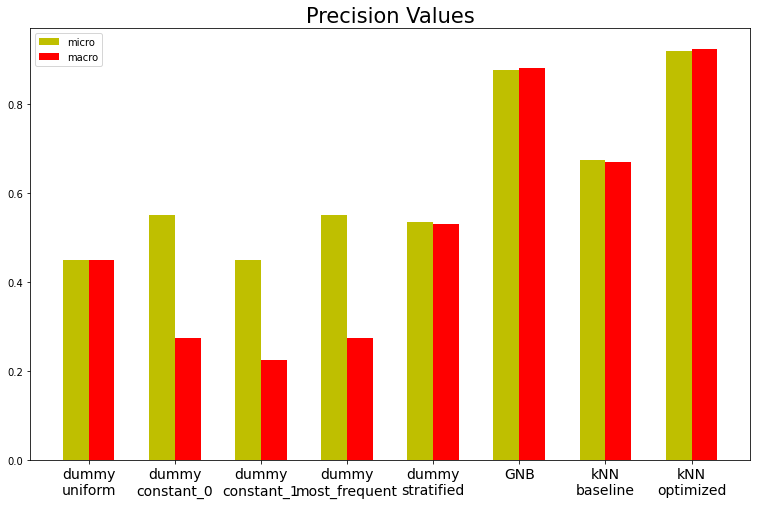

In [30]:
plots_for_classification([p_micro_list,p_macro_list],['y', 'r'],'Precision Values')

In [31]:
if (len(r_micro_list) == 7) :
  r_micro_list.append(r_micro)
  r_macro_list.append(r_macro)

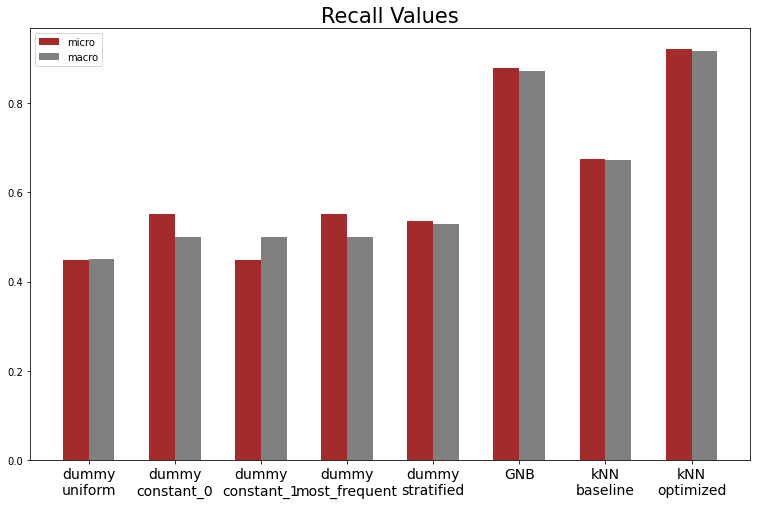

In [32]:
plots_for_classification([r_micro_list,r_macro_list],['brown', 'gray'],'Recall Values')

### 4 . Τυπώστε πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.

In [33]:
# Προφανώς μόνο ο knn μπορεί να βελτιστοποιηθεί

baseline_list = accuracy_list[0:7]
optimized_list = ['-','-','-','-','-','-',accuracy_list[7]]
increment_list = ['-','-','-','-','-','-',accuracy_list[7]-accuracy_list[6]]

df_list = [['dummy uniform','dummy constant_0','dummy constant_1','dummy most_frequent','dummy stratified','GNB','kNN'], baseline_list, optimized_list, increment_list]

df = pd.DataFrame (df_list).transpose()
df.columns = ['Classifiers','Baseline Accuracy(%)','Optimized Accuracy(%)','Increment(%)']

HTML(df.to_html(index=False))

Classifiers,Baseline Accuracy(%),Optimized Accuracy(%),Increment(%)
dummy uniform,51,-,-
dummy constant_0,55,-,-
dummy constant_1,45,-,-
dummy most_frequent,55,-,-
dummy stratified,51,-,-
GNB,88,-,-
kNN,67,92,25


### 5 . Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης, τη μεταβολή της απόδοσης και τους χρόνους εκτέλεσης.

Στο σημείο αυτό να σημειωθεί οτι τα διαγράμματα είναι σχεδόν ιδια με αυτά του  baseline (*βλ Baseline Classification: Ερώτημα 3*) , διαφέρουν όμως καθως προστέθηκε o βελτιστοποιημένος ταξινομητής Knn. Οπότε όλα τα παρακάτω θα σχολιαστούν ως προς αυτόν τον βελτιστοποιημένο ταξινομητή σε σχέση πάντα με τη baseline έκδοσή του. 
*   **Precicion,Recall,Πίνακες Σύγχυσης**: Παρατηρούμε ότι οι τιμές Precision - Recall αυξήθηκαν καθώς μετά την βελτιστοποίηση αυξήθηκε σημαντικά ο αριθμός των TP ενώ μειώθηκαν οι τιμές των FN,PN. Κάτι τέτοιο φαίνεται άλλωστε και απο πίνακες σύγχυσης. 
*   **f1**: Για τον παραπάνω λόγο αυξήθηκε και η μετρική f1, είτε χρησιμοοποιήθηκε micro είτε macro προσέγγιση (άλλωστε λόγω ισσοροπίας dataset καταλήξαμε σε παρόμοια αποτελεσματα).  
*   **Μεταβολή Απόδοσης**: Η μεταβολή της απόδοσης που επιτύχαμε ήταν της τάξης του 25 % πετυχαίνοντας accuracy 93 %. Συμβουλευόμενοι και το [paper](https://pdfs.semanticscholar.org/3bd9/7643d6c4c5466edd270acb87f1d581c9c27d.pdf), παρατηρούμε οτι στο πραγματικό dataset o knn πετυχαίνει 81.26%, ενώ με βελτιστοποίηση περίπου 98%. Οπότε αναλογιζόμενοι τους πόρους που χρησιμοποιήσαμε αλλά και τον αριθμό διαφορετικών περιπτώσεων στο gridSearch,η τιμή 93% είναι ικανοποιητικά κοντά στη τιμή που προήλθε απο έρευνα του Applied Mathematical Sciences.
*   **Χρόνοι Εκτέλεσης**: Είναι λογικό λόγω του GridSearch o χρόνος για έυρευση βέλτιστων υπερπαραμέτρων να είναι μεγάλος. Στην ουσία είχαμε 3 παραμέτρους για βελτιστοποίηση (Γείτονες,Κατώφλι Διασποράς, PCA συνιστώσες) και δοκιμάσαμε N τιμές για το καθένα. Λόγω των (3) εμφωλευμένων for του GridSearch η πολυπλοκότητα ήταν $ O(N^3)$, γεγονός που δικαιολογεί το χρόνο 117 sec (*βλ Βελτιστοποίηση Ταξινομητών, Ερώτηση3*)

<br><br>*Συμπέρασμα*:Καθώς η βιομηχανία απόδωσης πιστωτικών καρτών αλλά και δανείων είναι ένα αρκετά ανταγωνιστικό πεδίο, η παραπάνω προσέγγιση σεβόμενη πλήρως τα προσωπικά δεδομένα πελατών, πέτυχε μια καλή προσέγγιση στις προβλέψεις των "συμπεριφορών" τους. 










#Big Dataset

Το **Big dataset** το οποίο αντιστοιχεί στην ομάδα μας (70) είναι το:  [Statlog (Landsat Satellite)](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29)


In [34]:
#Λήψη Dataset και Ανάγνωση σαν Dataframe

# Προσοοχή αν ΔΕ βάλουμε header = None, 
# θα θεωρήσει οτι η πρώτη γραμμή των δεδομένων είναι οι Περιγραφές των Χαρακτηριστικών
# Στo csv τα χαρακτηριστικά είναι χωρισμένα με κενό, γι αυτο προσθέτουμε και το sep=' ' στην εντολή διαβάσματός του
df_train = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn",header = None, sep=' ')
df_test = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst",header = None, sep=' ')

print("Train Set: ",df_train.shape)
print("Test Set:  ",df_test.shape)

Train Set:  (4435, 37)
Test Set:   (2000, 37)


## Χρήσιμες Πληροφορίες για Dataset

### 1 . Σύντομη παρουσίαση του dataset (τι περιγράφει)

$\;\;\;\;\;\;$Το dataset αποτελείται από τις πολυ-φασματικές τιμές των pixel σε γειτονιές 3x3 σε μια δορυφορική εικόνα και την ταξινόμηση που σχετίζεται με το κεντρικό pixel σε κάθε γειτονιά. Στόχος είναι να προβλεφθεί αυτή η ταξινόμηση, με βάση τις πολυφασματικές τιμές. Στο dataset του δείγματος, η κλάση ενός pixel κωδικοποιείται ως αριθμός.
<br>
$\;\;\;\;\;\;$Ένα πλαίσιο εικόνων Landsat MSS αποτελείται από τέσσερις ψηφιακές εικόνες της ίδιας σκηνής σε διαφορετικές φασματικές ζώνες. Δύο από αυτά βρίσκονται στην ορατή περιοχή (αντιστοιχούν περίπου σε πράσινες και κόκκινες περιοχές του ορατού φάσματος) και δύο βρίσκονται στο (πλησίον) υπέρυθρο. Κάθε εικονοστοιχείο είναι μια δυαδική λέξη 8-bit, με 0 που αντιστοιχεί σε μαύρο και 255 σε λευκό. Η χωρική ανάλυση ενός pixel είναι περίπου 80m x 80m. Κάθε εικόνα περιέχει 2340 x 3380 τέτοια pixel.
<br>
$\;\;\;\;\;\;$Το dataset είναι μια (μικροσκοπική) υποπεριοχή μιας σκηνής, που αποτελείται από 82 x 100 pixel. Κάθε γραμμή δεδομένων αντιστοιχεί σε μια γειτονιά 3x3 τετραγωνικών εικονοστοιχείων που περιέχονται πλήρως στην υποπεριοχή 82x100. Κάθε γραμμή περιέχει τις τιμές pixel στις τέσσερις φασματικές ζώνες (μετατρέπονται σε ASCII) καθενός από τα 9 pixel στη γειτονιά 3x3 και έναν αριθμό που δείχνει την ετικέτα ταξινόμησης του κεντρικού pixel.
<br> <br>
*Πηγή:* [*sat.doc*](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.doc)

### 2 . Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;


$\;\;\;\;\;\;$Τα **δείγματα** είναι συνολικά 4435 για το train και 2000 για το test, ενώ τα **χαρακτηριστικά** 36. Τα δεδομένα δίνονται σε τυχαία σειρά και ορισμένες γραμμές δεδομένων έχουν αφαιρεθεί, ώστε να μην μπορούμε να ανακατασκευάσουμε την αρχική εικόνα από αυτό το σύνολο δεδομένων.
<br>
$\;\;\;\;\;\;$**Είδος χαρακτηριστικών**: Σε κάθε γραμμή δεδομένων δίδονται πρώτα οι τέσσερις φασματικές τιμές για το πάνω-αριστερό εικονοστοιχείο ακολουθούμενες από τις τέσσερις φασματικές τιμές για το πάνω-μεσαίο εικονοστοιχείο και έπειτα αυτές για το πάνω-δεξί εικονοστοιχείο και ούτω καθεξής με τα εικονοστοιχεία να διαβάζονται διαδοχικά από αριστερά προς τα δεξιά και από πάνω προς τα κάτω. Έτσι, οι τέσσερις φασματικές τιμές για το κεντρικό εικονοστοιχείο δίδονται από τα χαρακτηριστικά 17,18,19 και 20. Εάν θέλουμε, μπορούμε να χρησιμοποιήσουμε μόνο αυτά τα τέσσερα χαρακτηριστικά, αγνοώντας τα άλλα. Αυτό αποφεύγει το πρόβλημα που προκύπτει όταν μια γειτονιά 3x3 διασχίζει ένα όριο.
<br>
$\;\;\;\;\;\;$**Διατεταγμένα χαρακτηριστικά**: Τα χαρακτηριστικά είναι όλα αριθμητικά στο εύρος από 0 έως 255. <br><br>
*Πηγή:* [*sat.doc*](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.doc)

### 3 . Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών

Δεν παρέχονται **επικεφαλίδες** (feature names), αλλά ούτε και **αρίθμηση γραμμών** (κάθε γραμμή στο .trn αρχείο και στο .tst αρχείο έχει σαν πρώτο στοιχείο το 1<sup>ο</sup> χαρακτηριστικό και όχι κάποια αρίθμηση)

### 4 . Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται

Οι **ετικέτες** των κλάσεων, βρίσκονται στη τελευταία στήλη (**κολόνα 36**) και είναι έξι (1,2,3,4,5 και 7). Αυτές αφορούν:






1.   red soil
2.   cotton crop
3.   grey soil
4.   damp grey soil
5.   soil with vegetation stubble
6.   ~~mixture class~~
7.   very damp grey soil
<br><br>
<u>*Σημείωση</u>:Δεν υπάρχουν παραδείγματα με την κλάση 6 σε αυτό το σύνολο δεδομένων. Όλα έχουν αφαιρεθεί λόγω αμφιβολιών για την
εγκυρότητα αυτής της τάξης. (Πηγή: [sat.doc](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.doc)*)

### 5 . Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες

**Δεν χρειάστηκε** να κάνουμε κάποιες μετατροπές στα αρχεία text, αφού οι ετικέτες είναι κι αυτές numeric, όπως και τα χαρακτηριστικά. Επιπλέον, δεν είχαμε κάποιο πρόβλημα αντιστοίχισης λανθασμένων τύπων (sting αντί για int) όπως είχαμε πχ στο μικρό dataset παραπάνω.

### 6 . Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;

Δεν υπάρχει **καμία** απουσιάζουσα τιμή (NaN) ούτε στο Train Set ούτε στο Test Set. Ελέγχουμε επίσης ότι όντως όλες οι τιμές είναι μεταξύ του 0 και του 255.

In [35]:
print("Πλήθος NaN τιμών στο Train Set:  ",df_train.isnull().sum().sum())
print("Πλήθος NaN τιμών στο Test Set:   ",df_train.isnull().sum().sum())

print("Τιμές πάνω από 255 στο Train Set:",df_train.count().sum() - df_train[df_train > 255].isnull().sum().sum())
print("Τιμές πάνω από 255 στο Test Set: ",df_test.count().sum() - df_test[df_test > 255].isnull().sum().sum())

print("Τιμές κάτω από   0 στο Train Set:",df_train.count().sum() - df_train[df_train < 0].isnull().sum().sum())
print("Τιμές κάτω από   0 στο Test Set: ",df_test.count().sum() - df_test[df_test < 0].isnull().sum().sum())


Πλήθος NaN τιμών στο Train Set:   0
Πλήθος NaN τιμών στο Test Set:    0
Τιμές πάνω από 255 στο Train Set: 0
Τιμές πάνω από 255 στο Test Set:  0
Τιμές κάτω από   0 στο Train Set: 0
Τιμές κάτω από   0 στο Test Set:  0


### 7 . Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.

Οι κλάσεις, όπως αναφέραμε και πριν, είναι έξι (1,2,3,4,5,7). Η μεγαλύτερη απόκλιση είναι μεταξύ της κλάσης 1 (1072 δείγματα) και της κλάσης 4 (415 δείγματα). Θεωρώντας ένα dataset μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη, τότε το δικό μας dataset είναι σίγουρα **μη ισορροπημένο** (imbalanced).

In [36]:
# Frequency Counts of Column 36 in Train Set
print(df_train[36].value_counts())

1    1072
7    1038
3     961
2     479
5     470
4     415
Name: 36, dtype: int64


### 8 . Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.

Όπως αναφέραμε και δείξαμε προηγουμένως δεν υπάρχουν απουσιάζουσες τιμές ούτε μη διατεταγμένα χαρακτηριστικά. Επιπλέον, το ήδη χωρισμένο dataset έχει **31% για Test Set**, επομένως δεν χρειάζεται να κάνουμε κάποια συνένωση και split ξανά. Το μόνο που χρειάζεται είναι να εξάγουμε από τα δύο datasets τους πίνακες train, train_labels, test, test_labels που θα χρησιμοποιήσουν παρακάτω οι ταξινομητές.

In [37]:
print("Πλήθος Train Set: ",df_train[0].count())
print("Πλήθος Test Set:  ",df_test[0].count())
print("Ποσοστό Test Set: ",round(100*df_test.count().sum()/(df_train.count().sum()+df_test.count().sum())),"%")
print("")

train = df_train.iloc[:,:36].values
train_labels = df_train.iloc[:,36].values
test = df_test.iloc[:,:36].values
test_labels = df_test.iloc[:,36].values

print("Train features: ",train.shape)
print("Train labels:   ",train_labels.shape)
print("")
print("Test features: ",test.shape)
print("Test labels:   ",test_labels.shape)

Πλήθος Train Set:  4435
Πλήθος Test Set:   2000
Ποσοστό Test Set:  31.0 %

Train features:  (4435, 36)
Train labels:    (4435,)

Test features:  (2000, 36)
Test labels:    (2000,)


## Ταξινόμηση


*   **Ταξινομητές**: dummy, Gaussian Naive Bayes, kΝΝ, Multi-Layer Perceptron (MLP), Support Vector Machines (SVM)
*   **Data split**: 30% για test set και σχήμα 5-fold για cross-validation
*   **Μετρικές Απόδοσης(cv)**:f1_micro, f1_macro






## Baseline classification

### 1 . Διαχειριστείτε τυχόν απουσιάζουσες τιμές. Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.

In [38]:
#Συνάρτηση που επιστρέφει διάφορες μετρικές (precision, recall, f1 score, accuracy, time)
#Υπάρχει και στο Small Dataset
def baseline_classification (clf,train,train_labels,test,test_labels):
  
  #Έναρξη χρόνου
  start_time = time.time()

  #Εκπαίδευση Ταξινομητή
  clf.fit(train,train_labels)

  #Προβλέψεις
  preds = clf.predict(test)

  #Τέλος χρόνου
  time_passed = time.time() - start_time
  
  global classifier_number
  print(classifier_number,clf)
  print("i)  time =",round(time_passed,4),"sec")
  classifier_number = classifier_number+1

  #Επίδοση ταξινομητή
  acc = clf.score(test,test_labels)
  accuracy = round(100*acc)
  print("ii) acc =",accuracy,"%")

  #Οι (μοναδικές) ετικέτες είναι:
  uni_labels = np.unique(train_labels)
  uni_labels = uni_labels.tolist()

  #Confusion matrix
  cnf_matrix = confusion_matrix(test_labels, preds)
  plot_confusion_matrix(cnf_matrix,uni_labels)
  print("")

  #f1-micro average
  p_micro,r_micro,f1_micro,_ = precision_recall_fscore_support(test_labels, preds, average='micro')
  print("iv) fi_micro =",f1_micro*100,"%")

  #f1-macro average
  p_macro,r_macro,f1_macro,_ = precision_recall_fscore_support(test_labels, preds, average='macro')
  print("v) fi_macro  =",f1_macro*100,"%")
  print("")

  return (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),(time_passed,accuracy)


In [39]:
# Συνάρτηση για την απεικόνιση πίνακα σύγχυσης (Πηγή: scikit learn)
# Υπάρχει και στο Small Dataset
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    print('iii) Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [40]:
# Συνάρτηση για απεικόνιση γραφικών παραστάσεων μετρικών σε bar plots
def plots_for_classification(data,colors,title,clf = 'None'):

  number_of_classifiers = len(data[0])
  X = np.arange(number_of_classifiers)
  
  fig = plt.figure(figsize = (10,6))

  if (clf == 'None'):
    fig = plt.figure(figsize = (10,6))
    w = 0.3
    off = 0.15
  else:
    fig = plt.figure(figsize = (8,5))
    w =0.2
    off = 0.1


  if (number_of_classifiers==7):
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X - off, data[0], color = colors[0], width = w)
    ax.bar(X + off, data[1], color = colors[1], width = w)
    plt.xticks(X,['dummy\nuniform','dummy\nconstant_0','dummy\nconstant_1','dummy\nmost_frequent','dummy\nstratified','GNB','kNN\nbaseline'],fontsize = 14)
    ax.legend(labels=['micro', 'macro'])
    ax.set_title(title,fontsize = 21)
    
  elif (number_of_classifiers==8):
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X - off, data[0], color = colors[0], width = w)
    ax.bar(X + off, data[1], color = colors[1], width = w)
    plt.xticks(X,['dummy\nuniform','dummy\nconstant_0','dummy\nconstant_1','dummy\nmost_frequent','dummy\nstratified','GNB','kNN\nbaseline','kNN\noptimized'],fontsize = 14)
    ax.legend(labels=['micro', 'macro'])
    ax.set_title(title,fontsize = 21)

  elif (number_of_classifiers==15) and (clf == 'None'):
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X - off, data[0], color = colors[0], width = w)
    ax.bar(X + off, data[1], color = colors[1], width = w)
    plt.xticks(X,['dummy\nuniform',
                  'dummy\nconstant_1',
                  'dummy\nconstant_2',
                  'dummy\nconstant_3',
                  'dummy\nconstant_4',
                  'dummy\nconstant_5',
                  'dummy\nconstant_7',
                  'dummy\nmost_frequent',
                  'dummy\nstratified',
                  'GNB',
                  'kNN\nbaseline',
                  'MLP\nbaseline',
                  'SVM_Lin\nbaseline',
                  'SVM_Poly\nbaseline',
                  'SVM_Rbf\nbaseline'],fontsize = 14,rotation = 60)
    ax.legend(labels=['micro', 'macro'])
    ax.set_title(title,fontsize = 21)

  elif (clf != 'None'):
    fig, axs = plt.subplots(2,3,figsize=(18,8))
    fig.suptitle(title,fontsize = 24)
    
    axs[0,0].set_xticks(X)
    axs[0,0].bar(X - off, data[0], color = colors[0], width = w)
    axs[0,0].bar(X + off, data[1], color = colors[1], width = w)
    axs[0,0].set_xticklabels(['baseline','optimized by\nf1_micro','optimized by\nf1_macro'])
    axs[0,0].legend(labels=['micro', 'macro'])
    axs[0,0].set_title("kNN",fontsize = 13)

    axs[0,2].set_xticks(X)
    axs[0,2].bar(X - off, data[2], color = colors[0], width = w)
    axs[0,2].bar(X + off, data[3], color = colors[1], width = w)
    axs[0,2].set_xticklabels(['baseline','optimized by\nf1_micro','optimized by\nf1_macro'])
    axs[0,2].legend(labels=['micro', 'macro'])
    axs[0,2].set_title("MLP",fontsize = 13)

    axs[1,0].set_xticks(X)
    axs[1,0].bar(X - off, data[4], color = colors[0], width = w)
    axs[1,0].bar(X + off, data[5], color = colors[1], width = w)
    axs[1,0].set_xticklabels(['baseline','optimized by\nf1_micro','optimized by\nf1_macro'])
    axs[1,0].legend(labels=['micro', 'macro'])
    axs[1,0].set_title("SVM Linear",fontsize = 13)

    axs[1,1].set_xticks(X)
    axs[1,1].bar(X - off, data[6], color = colors[0], width = w)
    axs[1,1].bar(X + off, data[7], color = colors[1], width = w)
    axs[1,1].set_xticklabels(['baseline','optimized by\nf1_micro','optimized by\nf1_macro'])
    axs[1,1].legend(labels=['micro', 'macro'])
    axs[1,1].set_title("SVM Poly",fontsize = 13)

    axs[1,2].set_xticks(X)
    axs[1,2].bar(X - off, data[8], color = colors[0], width = w)
    axs[1,2].bar(X + off, data[9], color = colors[1], width = w)
    axs[1,2].set_xticklabels(['baseline','optimized by\nf1_micro','optimized by\nf1_macro'])
    axs[1,2].legend(labels=['micro', 'macro'])
    axs[1,2].set_title("SVM Linear",fontsize = 13)

    axs[0,1].axis('off')
    fig.tight_layout()


1 DummyClassifier(constant=None, random_state=None, strategy='uniform')
i)  time = 0.0008 sec
ii) acc = 17.0 %
iii) Confusion matrix, without normalization


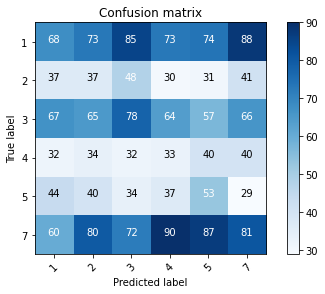


iv) fi_micro = 17.5 %
v) fi_macro  = 17.07179568319377 %

2 DummyClassifier(constant=1, random_state=None, strategy='constant')
i)  time = 0.0005 sec
ii) acc = 23.0 %
iii) Confusion matrix, without normalization


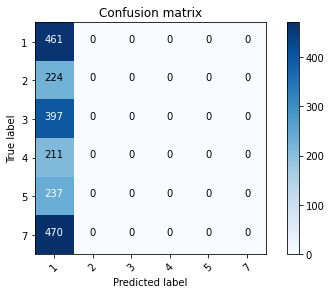


iv) fi_micro = 23.05 %
v) fi_macro  = 6.2440742245699585 %

3 DummyClassifier(constant=2, random_state=None, strategy='constant')
i)  time = 0.0011 sec
ii) acc = 11.0 %
iii) Confusion matrix, without normalization


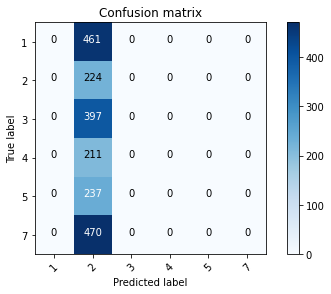


iv) fi_micro = 11.200000000000001 %
v) fi_macro  = 3.357314148681055 %

4 DummyClassifier(constant=3, random_state=None, strategy='constant')
i)  time = 0.0012 sec
ii) acc = 20.0 %
iii) Confusion matrix, without normalization


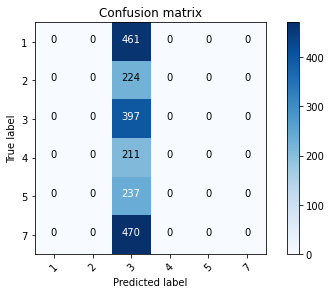


iv) fi_micro = 19.850000000000005 %
v) fi_macro  = 5.520789876234181 %

5 DummyClassifier(constant=4, random_state=None, strategy='constant')
i)  time = 0.0005 sec
ii) acc = 11.0 %
iii) Confusion matrix, without normalization


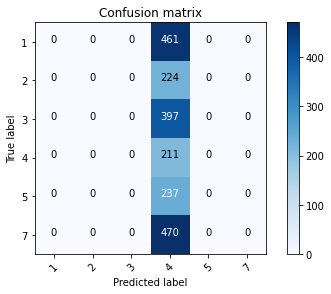


iv) fi_micro = 10.549999999999999 %
v) fi_macro  = 3.181064375094226 %

6 DummyClassifier(constant=5, random_state=None, strategy='constant')
i)  time = 0.001 sec
ii) acc = 12.0 %
iii) Confusion matrix, without normalization


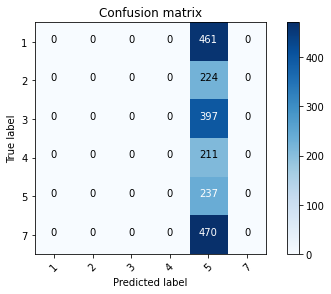


iv) fi_micro = 11.85 %
v) fi_macro  = 3.5315154224407683 %

7 DummyClassifier(constant=7, random_state=None, strategy='constant')
i)  time = 0.0006 sec
ii) acc = 24.0 %
iii) Confusion matrix, without normalization


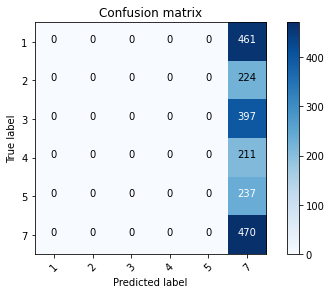


iv) fi_micro = 23.5 %
v) fi_macro  = 6.342780026990553 %

8 DummyClassifier(constant=None, random_state=None, strategy='most_frequent')
i)  time = 0.0005 sec
ii) acc = 23.0 %
iii) Confusion matrix, without normalization


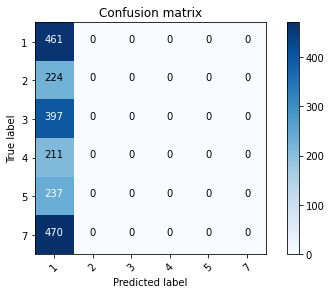


iv) fi_micro = 23.05 %
v) fi_macro  = 6.2440742245699585 %

9 DummyClassifier(constant=None, random_state=None, strategy='stratified')
i)  time = 0.0013 sec
ii) acc = 17.0 %
iii) Confusion matrix, without normalization


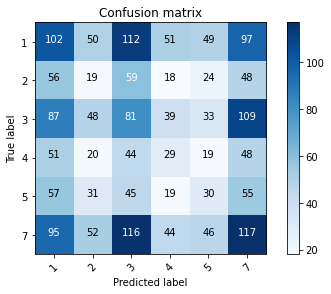


iv) fi_micro = 18.9 %
v) fi_macro  = 17.094840948239277 %

10 GaussianNB(priors=None, var_smoothing=1e-09)
i)  time = 0.0117 sec
ii) acc = 80.0 %
iii) Confusion matrix, without normalization


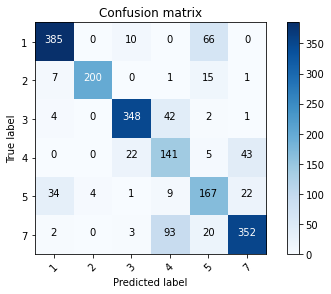


iv) fi_micro = 79.65 %
v) fi_macro  = 78.3275973185728 %

11 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
i)  time = 0.2983 sec
ii) acc = 90.0 %
iii) Confusion matrix, without normalization


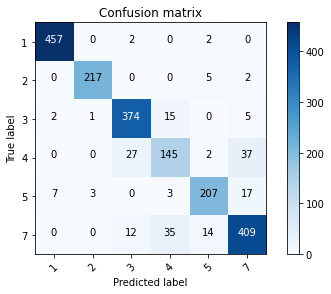


iv) fi_micro = 90.45 %
v) fi_macro  = 89.13680481858998 %

12 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
i)  time = 2.7622 sec
ii) acc = 79.0 %
iii) Confusion matrix, without normalization


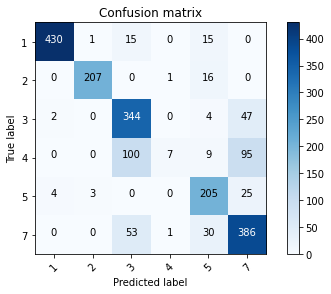


iv) fi_micro = 78.95 %
v) fi_macro  = 71.33674053895199 %

13 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
i)  time = 2.3703 sec
ii) acc = 62.0 %
iii) Confusion matrix, without normalization


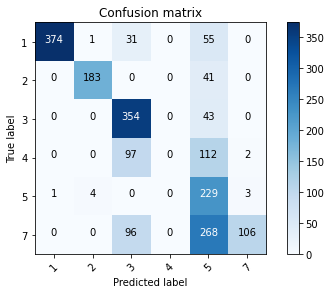


iv) fi_micro = 62.3 %
v) fi_macro  = 55.651715767263745 %

14 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
i)  time = 1.263 sec
ii) acc = 89.0 %
iii) Confusion matrix, without normalization


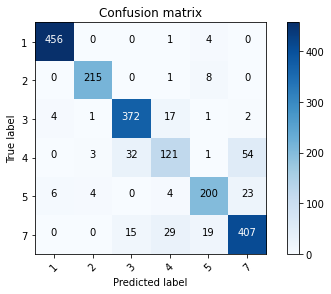


iv) fi_micro = 88.55 %
v) fi_macro  = 86.50481257442311 %

15 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
i)  time = 0.5712 sec
ii) acc = 89.0 %
iii) Confusion matrix, without normalization


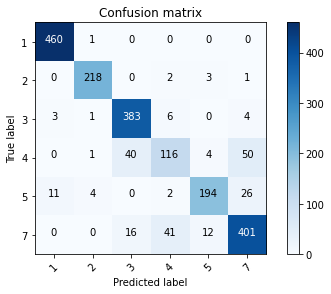


iv) fi_micro = 88.6 %
v) fi_macro  = 86.49479572008595 %



In [41]:
#ΟΡΙΖΟΥΜΕ ΞΑΝΑ ΤΟΥΣ ΤΑΞΙΝΟΜΗΤΕΣ ΜΑΣ 
#ΜΙΑΣ ΚΑΙ ΕΧΟΥΝ ΕΚΠΑΙΔΕΥΤΕΙ ΣΤΟ 
#ΠΡΟΗΓΟΥΜΕΝΟ DATASET

## Dummy
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1  = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_constant_3  = DummyClassifier(strategy="constant", constant=3)
dc_constant_4 = DummyClassifier(strategy="constant", constant=4)
dc_constant_5  = DummyClassifier(strategy="constant", constant=5)
dc_constant_7 = DummyClassifier(strategy="constant", constant=7)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

#Gaussian Naive Bayes
gnb = GaussianNB()

#kNN
kNN = neighbors.KNeighborsClassifier()

#MLP
mlp = MLPClassifier()

#SVM
svm_lin = LinearSVC()
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

classifiers  = [dc_uniform,
                dc_constant_1,
                dc_constant_2,
                dc_constant_3,
                dc_constant_4,
                dc_constant_5,
                dc_constant_7,
                dc_most_frequent,
                dc_stratified,
                gnb,
                kNN,
                mlp,
                svm_lin,
                svm_poly,
                svm_rbf]

#Αρχικοποίηση λιστών για μετρικές που αφορούν όλους τους ταξινομητές που μελετήσαμε
p_micro_list = []
r_micro_list = []
f1_micro_list = []

p_macro_list = []
r_macro_list = []
f1_macro_list = []

time_list = []
accuracy_list = []


classifier_number= 1

#Εκπαίδευση ταξινομητών, εξαγωγή μετρικών και εισαγωγή σε λίστα
for clf in classifiers:
  (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),(time_passed,accuracy) = baseline_classification(clf,train,train_labels,test,test_labels)
  
  p_micro_list.append(p_micro)
  p_macro_list.append(p_macro)
  
  r_micro_list.append(r_micro)
  r_macro_list.append(r_macro)

  f1_micro_list.append(f1_micro)
  f1_macro_list.append(f1_macro)

  time_list.append(time_passed)

  accuracy_list.append(accuracy)

### 2 . Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.

<Figure size 720x432 with 0 Axes>

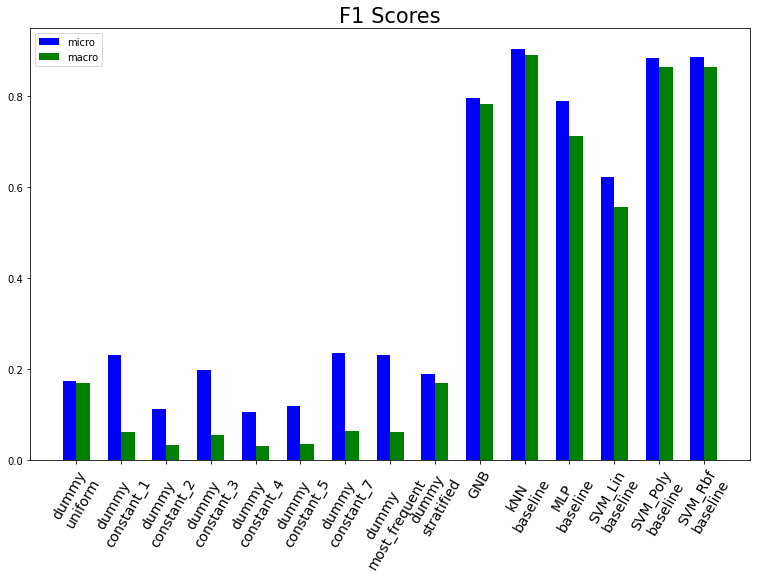

In [42]:
plots_for_classification([f1_micro_list,f1_macro_list],['b', 'g'],'F1 Scores')

<Figure size 720x432 with 0 Axes>

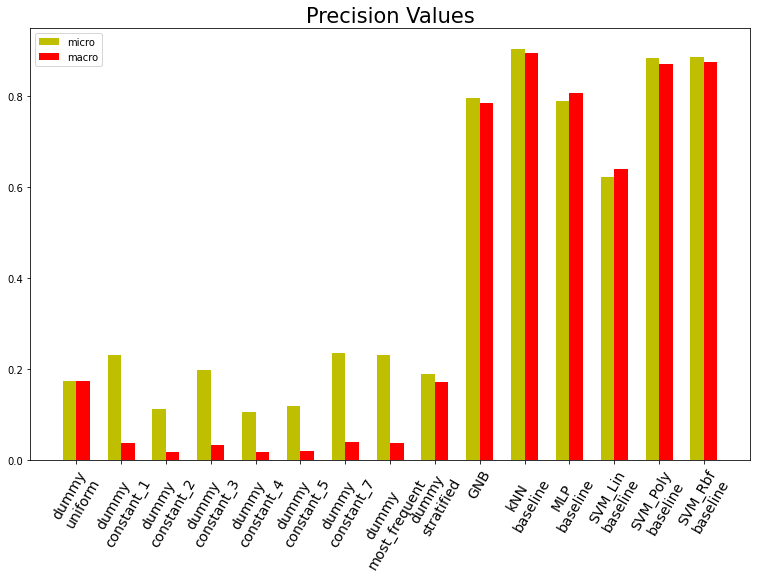

In [43]:
plots_for_classification([p_micro_list,p_macro_list],['y', 'r'],'Precision Values')

<Figure size 720x432 with 0 Axes>

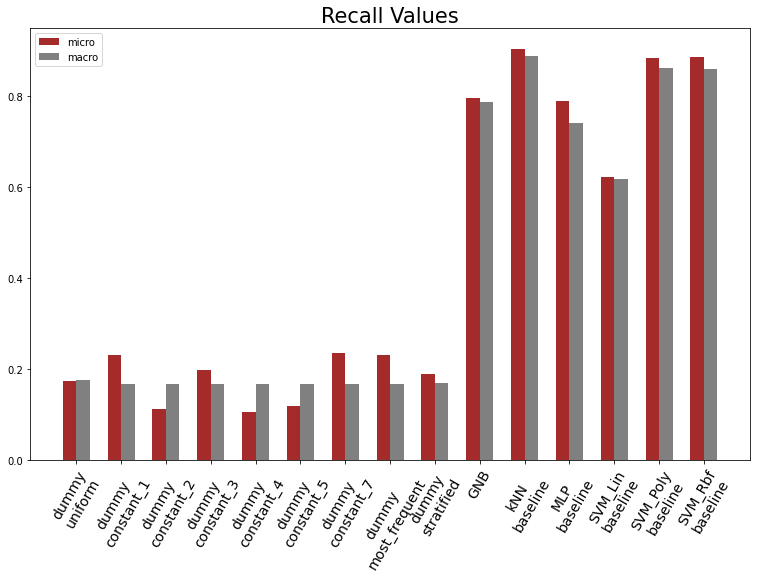

In [44]:
plots_for_classification([r_micro_list,r_macro_list],['brown', 'gray'],'Recall Values')

### 3 . Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης.

*   **Plots**: Στην παραπάνω ανάλυση χρησιμοποιήσαμε,όπως φαίνεται και απο τα plots, dummy classifiers. Απώτερος σκοπός αυτής της ανάλυσης, ήταν να δούμε αν οι τέσσερις ταξινομητές μας (Knn, GNB, MLP, SVM), αποδίδουν καλύτερα απο αυτούς για το ίδιο Dataset.(Κάθε αναλυτική προσέγγιση για ένα πρόβλημα ταξινόμησης θα πρέπει να υπερτερεί μεθόδων που βασίζονται απλά σε μια τυχαία διαδικασία). Η παραπάνω "φιλοσοφία" αποτωπώθηκε σε όλα τα plots (τόσο ως προς precision οσο και ως προς recall και f1). Αναλυτικά παρακάτω:
<br>
*   **Precision,Recall**: Στη συνέχεια μελετήσαμε τη τιμή του Presicion που στην ουσία υποδήλωνε το εξής: Αναφορικά με τις προβλέψεις για μια κλάση, πόσες ανταποκρινόντουσαν στη πραγματικότητα (ήταν ίδιες με πραγματική τιμή). Ταυτόχρονα, σχολιάστηκε και τη τιμή Recall που υποδήλωνε το εξής: Aναφορικά με μια κλάση, πόσες προβλέψεις απο όσες έγιναν,ήταν σωστές  <br>$\;\;\;\;\;\;$Αξίζει να σταθεί κανείς στο γεγονός οτι απο τους constant_dummy, μπορεί κανείς να συμπεράνει την μικρή υπεροχή των δειγμάτων "1" και "7". Μάλιστα τα Precision,Recall των dummy constant_1,dummy_constant_7 είναι ίδια με του most_frequent για τον ίδιο λόγο. Τέλος παρατηρείται ότι dummy uniform και dummy_stratified, έχουν ίδιες τιμές Precision αλλά και Recall αφου και οι δύο κάνουν προβλέψεις σεβόμενοι την κατανομή των ετικετών. Εν γένει διαφέρουν, αλλά στο ισσοροπημεο Dataset που διαθέτουμε, κάνουν παρόμοιες προβλέψεις.
<br>$\;\;\;\;\;\;$Τέλος ο GNB,  αποδίδει καλά ως προς precision και recall ενώ ο knn επισημαίνει την ανάγκη βελτιστοποίησης των υπερπαραμέτρων του.
*   **f1**: Είδαμε παραπάνω οτι μπορεί να καταλήξαμε σε κάποια κοινά συμπεράσματα μελετώντας precision,recall ταυτόχρονα, ωστόσο όμως τα επιμέρους αποτελέσματα δεν παύουν να είναι διαφορετικά. Άλλωστε ας μην ξεχνάμε το trade off μεταξύ των δυο αυτών εννοιών. Για το λόγο αυτό μελετήσαμε και την απόδοση ως προς μετρική f1 (micro & macro). Να σημειωθεί στο σημείο αυτό ότι χρησιμοποιώντας στρατηγική macro, οι μετρικές υπολογίζονται ανεξάρτητα για κάθε κλάση και στη συνέχεια υπολογίζεται μια μέση τιμή, ενω χρησιμοποιώντας τη τεχνική micro, λαμβάνονται υπόψιν η κατανομή των κλάσεων. Και στην περίπτωση μας, όπου το dataset **δεν** είναι ισορροποπημένο (για κλάση "1" 1072 δείγματα, για κλάση "4" 415 δείγματα) παρατηρούμε **διαφορετικές** τιμές micro - macro για όλους τους ταξινομητές μας εκτος απο dummy_uniform. Oπότε λόγω αυτής της ιδιαιτερότητας, κατάλληλη μετρική εκτιμάται ότι είναι το f1_micro (πιο αντικειμενική), ενώ αν θέλουμε να δούμε πως συμπεριφέρεται γενικά στο σύύνολο των δεδομέων (ανεξαρτήτως κατανομής), θα προτιμήσουμε f1_macro.
*   **Πίνακες Σύγχησης**:Απο τους πίνακες σύγχησης εξάγονται όλες οι παραπάνω μετρικές, οι οποίες σχολιάστηκαν. Αξιζεί κανείς να σταθεί στο γεγονός γιατί μελετάμε μετρική f1 και όχι accuracy. Στο Dataset μας, κρίσιμες τιμές αποτελούν κυρίως οι προβλεψεις που ανταποκρινότουσαν σε πραγματικότητα (σε αντίθεση με ιατρικά θέματα πχ που πιο μεγάλο βάρος έχουν οι λάθος προβλέψεις).Οπότε μια καλή μετρική θα ήταν το accuracy. Ωστόσο λόγω της ανισσοροπίας Dataset, το accuracy θα μας δώσει μια γενική εικόνα για το σύνολο του, κάτι το οποίο δε θέλουμε. Οπότε προτιμούμε μετρικές f1.



## Βελτιστοποίηση Ταξινομητών

### 1 . Για κάθε ταξινομητή βελτιστοποιήστε την απόδοσή του στο training set μέσω της διαδικασίας προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (δεν έχουν όλοι οι ταξινομητές υπερπαραμέτρους). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average. 


Σχόλια για τις βελτιστοποιήσεις:


*   Προκειμένου να είναι πιο ευανάγνωστο το notebook, παραθέτουμε το GridSearch μόνο **μια φορά** για f1_micro και όχι και για f1_macro. Τις διαφορετικές υπερπαραμέτρους που προέκυψαν, τις διαχειριστήκαμε προφανώς **ξεχωριστά** για κάθε ένα μοντέλο.
.<br><br>
Ενδεικτικά οι χρόνοι για το GridSearch των ταξινομητών ήταν:

$\;\;\;\;\;\;\;\;\;\;\;\;\;$1.   kNN: 440.768 sec<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;$2.   MLP: 31360.337 sec<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;$3.   SVM_LINEAR: 1251.225 sec<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;$4.   SVM_POLY: 1309.162 sec<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;$5.   SVM_RBF: 1827.193<br>


(Προσοχή δεν χρειάζεται να εκτελεστεί το κελί ξανά, καθώς ο χρόνος είναι αρκετά μεγάλος.Στο Lab1.py οι κώδικες των GridSearch ειναι σε σχόλια)


In [45]:
#  Αρχικοποιούμε τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

In [46]:
# Αρχικά μελετάμε το variance των μεταβλητών για τη variance threshold
train_variance = train.var(axis=0)
print(train_variance)
print("Max value of variance is",np.max(train_variance))

[186.27051681 516.31275437 277.89845029 349.44104834 183.62675469
 520.26127364 276.41418734 350.14499727 182.15108963 520.32985052
 278.04170596 354.98852426 186.48053474 519.09959391 278.44533651
 353.4416506  183.86488924 520.52972418 279.71170222 355.01227242
 181.28130417 520.89916029 279.48972601 358.02861404 186.22076752
 518.309292   278.87811645 356.53721354 183.12607162 520.27409031
 280.20591457 358.63588728 180.53333977 518.0229399  277.51751866
 356.95989323]
Max value of variance is 520.8991602872


#### kNN

In [47]:
# Συνάρτηση βελτιστoπoίησης knn μέσω Grid Search και επιστροφή μετρικών με βάση μετρική απόδοσης (micro or macro)
def knn_optimization_bd (score,vthreshold,n_components,weights,metric,k):
  
  # Αρχικοποίηση Pipeline και GridSearch Estimator
  pipe = Pipeline(steps=[('selector', selector),
                         ('sampler', ros),
                         ('scaler', scaler),
                         ('pca', pca), 
                         ('kNN', clf)], memory = 'tmp')
  
  estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, 
                                      pca__n_components=n_components,
                                      kNN__weights=weights,
                                      kNN__metric =metric, 
                                      kNN__n_neighbors=k), cv=5, scoring=score, n_jobs=-1)
 
  # Έναρξη χρόνου
  start_time = time.time()

  # Κάνουμε fit τον ταξινομητή στο train set και predict στο test set
  estimator.fit(train, train_labels)
  preds = estimator.predict(test)

  # Λήξη χρόνου
  time_f1 = time.time() - start_time
  
  # Εκτύπωση βέλτιστων υπερ-παραμέτρων
  print(estimator.best_params_)
  print("")

  # Πίνακας σύγχυσης
  cnf_matrix = confusion_matrix(test_labels, preds)
  uni_labels = np.unique(train_labels)
  uni_labels = uni_labels.tolist()
  plot_confusion_matrix(cnf_matrix,uni_labels)
  print("")
  
  # Εκτύπωση μετρικών
  accuracy = round(100*estimator.score(test, test_labels))

  p_micro,r_micro,f1_micro,_ = precision_recall_fscore_support(test_labels, preds, average='micro')
  p_macro,r_macro,f1_macro,_ = precision_recall_fscore_support(test_labels, preds, average='macro')

  print("fi_micro average is:",round(100*f1_micro),"%")
  print("fi_macro average is:",round(100*f1_macro),"%")

  return (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1,accuracy

{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 17, 'kNN__weights': 'distance', 'pca__n_components': 13, 'selector__threshold': 0}

iii) Confusion matrix, without normalization


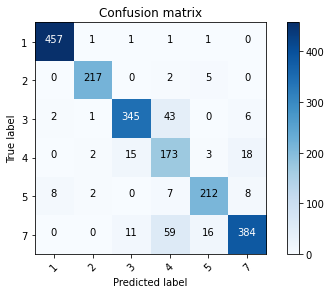


fi_micro average is: 89.0 %
fi_macro average is: 89.0 %


In [ ]:
#@title GridSearch (kNN)

clf = neighbors.KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

#Μείωση Διαστατικότητας
n_components = [10,13,15,17,25,30]                    # Το Πλήθος των Κύριων συνιστωσών PCA που κρατήσαμε
vthreshold = [0,5,180] 
#Υπερπαράμετροι ταξινομητή:
k = [5,7,9,11,13,15,17,19,21]                                   # Πλήθος Γειτόνων 
weights =['uniform','distance']
metric = ['minkowski','euclidean','manhattan']   

# Βελτιστοποίηση με βάση το f1_micro
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = knn_optimization_bd ('f1_micro',vthreshold,n_components,weights,metric,k)

##### α)f1 micro

{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 2, 'kNN__weights': 'distance', 'pca__n_components': 13, 'selector__threshold': 0}

iii) Confusion matrix, without normalization


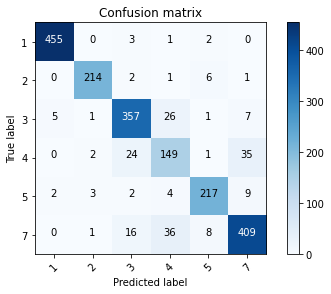


fi_micro average is: 90.0 %
fi_macro average is: 89.0 %


In [48]:
clf = neighbors.KNeighborsClassifier(n_jobs=-1)

# Επιλογή Βέλτιστων Παραμέτρων 

# Μετασχηματιστές
n_components = [13,36]                          
vthreshold = [0]

# Υπερπαράμετροι ταξινομητή:
k = [2]
weights =['distance']
metric = ['minkowski']     

# Βελτιστοποίηση ταξινομητή και εξαγωγή μετρικών
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = knn_optimization_bd ('f1_micro',vthreshold,n_components,weights,metric,k)

if (len(time_list) == 15):
  time_list.append(time_f1_micro)
  
  # Προσθήκη μετρικών στις λίστες μας
  accuracy_list.append(accuracy_f1_micro)

  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

**Σημείωση**: Παρατηρούμε ότι τα περισσότερα λάθη στις προβλέψεις αφορούν την κλάση 7. Αρκετά δείγματα (75 απο τα 459) ταξινομούνται λάθος στις κλάσεις 4 και 5.

##### β)f1 macro

{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 2, 'kNN__weights': 'distance', 'pca__n_components': 13, 'selector__threshold': 0}

iii) Confusion matrix, without normalization


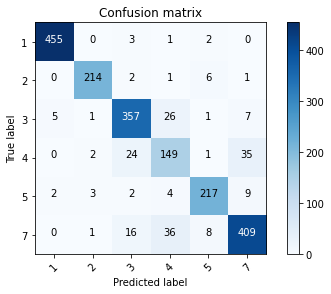


fi_micro average is: 90.0 %
fi_macro average is: 89.0 %


In [49]:
clf = neighbors.KNeighborsClassifier(n_jobs=-1)

# Επιλογή Βέλτιστων Παραμέτρων 
#Μείωση Διαστατικότητας
n_components = [13]                          # Το Πλήθος των Κύριων συνιστωσών PCA που κρατήσαμε
vthreshold = [0] 
#Υπερπαράμετροι ταξινομητή:
k = [2]                                      # Πλήθος Γειτόνων 
weights =['distance']
metric = ['minkowski']     

# Βελτιστοποίηση με βάση το f1_macro
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_macro,accuracy_f1_macro = knn_optimization_bd ('f1_macro',vthreshold,n_components,weights,metric,k)

# Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας (μια φορά όσες και να τρέξει το κελί)
if (len(time_list) == 16):
  time_list.append(time_f1_macro)

  # Προσθήκη απόδοσης στη λίστα μας
  accuracy_list.append(accuracy_f1_macro)

  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

##### **Σχόλια για βελτιστοποίηση kNN με PipeLine και GridSearch**
Παρατηρούμε ότι μετά τη βελτιστοποίηση οι τιμές f1 micro - f1 macro, είναι αρκετά κοντά στις αντίστοιχες του baseline. Αυτό επιβεβαιώθηκε με εξαντλητική παραμετροποίηση. Οπότε δεν ειναι εφικτό να πετύχουμε καλύτερες τιμές. Ορισμένα στάδια προεπεξεργασίας και οι τιμές των υπερπαραμέτρων που εξετάσαμε με την διαδικασία βελτιστοποίησης στο GridSearch είναι οι εξής:

*   **StandardScaler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Standard Scaler για την κανονικοποίηση των χαρακτηριστικών.

*   **RandomOverSampler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Random Over Sampler για την εξισορρόπηση του μη ισορροπημένου (όπως δείξαμε προηγουμένως) dataset.

*   **vthreshold**: Αρχικά πήραμε δείγματα από όλη την περιοχή τιμών [0 - max_var] και το βέλτιστο βρέθηκε το μηδέν. Γι αυτό το λόγο στην συνέχεια δοκιμάσαμε τιμές πιο κοντά στο μηδέν [0 - 1], αλλά και πάλι το καλύτερο ήταν το μηδέν. Επομένως, αντιληφθήκαμε ότι τελικά δεν χρειάζεται αυτό το στάδιο προεπεξεργασίας στην βελτιστοποίηση του kNN.

*   **n_components**: Για το πλήθος των κύριων συνιστωσών PCA που κρατάμε, δοκιμάσαμε αρχικά διάφορες τιμές στην περιοχή [0 - 36] και το βέλτιστο αποτέλεσμα ήταν το 15. Στην συνέχεια, επικεντρωθήκαμε σε περιοχή πιο κοντά στην τιμή 15 [12 - 18] και βρήκαμε ότι η βέλτιστη τιμή για το n_components είναι το 13.

*   **k_neighbors**: Για το πλήθος των γειτόνων του kNN ταξινομητή, δοκιμάσαμε αρκετές τιμές αρχικά σε μεγάλο εύρος και στη συνέχεια σε μικρότερο, οπότε τελικά καταλήξαμε στην βέλτιστη τιμή 2.

*   **weights**: Για την υπερπαράμετρο weights του kNN ταξινομητή, τοποθετήσαμε στο GridSearch όλες τις δυνατές τιμές του ('uniform','distance') και η βέλτιστη που προέκυψε ήταν η 'distance'.

*   **metric**: Για την υπερπαράμετρο metric του kNN ταξινομητή, τοποθετήσαμε στο GridSearch όλες τις δυνατές τιμές του ('minkowski','euclidean','manhattan') και η βέλτιστη που προέκυψε ήταν η 'minkowski'.


#### MLP

In [50]:
# Συνάρτηση βελτιστoπoίησης mlp μέσω Grid Search και επιστροφή μετρικών με βάση μετρική απόδοσης (micro or macro)
#activation, solver, max_iter, learning_rate, alpha
def mlp_optimization_bd (score,n_components,activation, solver, max_iter, learning_rate, alpha):
  
  # Αρχικοποίηση Pipeline και GridSearch Estimator
  pipe = Pipeline(steps=[('scaler', scaler), 
                         ('sampler', ros), 
                         ('pca', pca), 
                         ('mlp', clf)], memory = 'tmp')
  
  estimator = GridSearchCV(pipe, dict(pca__n_components=n_components,
                                      mlp__activation =activation,
                                      mlp__solver=solver,
                                      mlp__max_iter=max_iter,
                                      mlp__learning_rate = learning_rate,
                                      mlp__alpha=alpha), cv=5, scoring=score, n_jobs=-1)
  
  # Έναρξη χρόνου
  start_time = time.time()
  
  # Κάνουμε fit τον ταξινομητή στο train set και predict στο test set
  estimator.fit(train, train_labels)
  preds = estimator.predict(test)

  # Λήξη χρόνου
  time_f1 = time.time() - start_time

  # Εκτύπωση βέλτιστων υπερ-παραμέτρων
  print(estimator.best_params_)
  print("")

  # Πίνακας σύγχυσης
  cnf_matrix = confusion_matrix(test_labels, preds)
  uni_labels = np.unique(train_labels)
  uni_labels = uni_labels.tolist()
  plot_confusion_matrix(cnf_matrix,uni_labels)
  print("")
  
  # Εκτύπωση μετρικών
  accuracy = round(100*estimator.score(test, test_labels))

  p_micro,r_micro,f1_micro,_ = precision_recall_fscore_support(test_labels, preds, average='micro')
  p_macro,r_macro,f1_macro,_ = precision_recall_fscore_support(test_labels, preds, average='macro')

  print("fi_micro average is:",round(100*f1_micro),"%")
  print("fi_macro average is:",round(100*f1_macro),"%")

  return (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1,accuracy

{'mlp__activation': 'relu', 'mlp__alpha': 10, 'mlp__learning_rate': 'constant', 'mlp__max_iter': 300, 'mlp__solver': 'lbfgs', 'pca__n_components': 13}

iii) Confusion matrix, without normalization


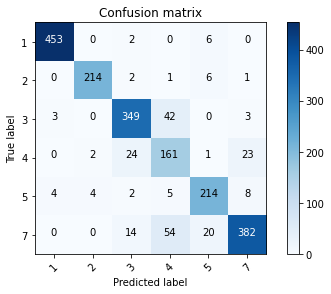


fi_micro average is: 89.0 %
fi_macro average is: 88.0 %


In [ ]:
#@title GridSearch (MLP)
clf = MLPClassifier(hidden_layer_sizes=(50, ))
#Μείωση Διαστατικότητας
n_components = [10,13,15,17,25]                    # Το Πλήθος των Κύριων συνιστωσών PCA που κρατάμε

#Υπερπαράμετροι ταξινομητή:
activation=['identity', 'logistic', 'tanh', 'relu']
solver= ['lbfgs', 'sgd', 'adam']
max_iter=[200,300,400]
learning_rate =['constant', 'invscaling', 'adaptive']
alpha = [1e-5,1e-4,1e-3,1e-1,10]


# Βελτιστοποίηση με βάση το f1_micro
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = mlp_optimization_bd ('f1_micro',n_components,activation, solver, max_iter, learning_rate, alpha)

##### α)f1 micro

{'mlp__activation': 'relu', 'mlp__alpha': 10, 'mlp__learning_rate': 'constant', 'mlp__max_iter': 300, 'mlp__solver': 'lbfgs', 'pca__n_components': 13}

iii) Confusion matrix, without normalization


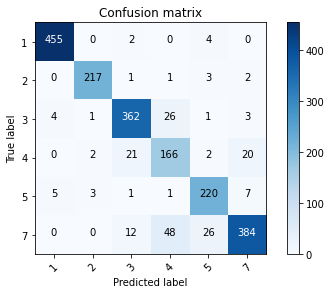


fi_micro average is: 90.0 %
fi_macro average is: 89.0 %


In [51]:
clf = MLPClassifier(hidden_layer_sizes=(50, ))

# Επιλογή Βέλτιστων Παραμέτρων 

# Μετασχηματιστές
n_components = [13]                    

#Υπερπαράμετροι ταξινομητή:
activation=['relu']
solver= ['lbfgs']
max_iter=[300]
learning_rate =['constant']
alpha = [10]

# Βελτιστοποίηση ταξινομητή και εξαγωγή μετρικών
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = mlp_optimization_bd ('f1_micro',n_components,activation, solver, max_iter, learning_rate, alpha)

if  (len(time_list)==17):
  # Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
  time_list.append(time_f1_micro)

  # Προσθήκη μετρικών στις λίστες μας
  accuracy_list.append(accuracy_f1_micro)

  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

##### α)f1 macro

{'mlp__activation': 'relu', 'mlp__alpha': 10, 'mlp__learning_rate': 'constant', 'mlp__max_iter': 300, 'mlp__solver': 'lbfgs', 'pca__n_components': 13}

iii) Confusion matrix, without normalization


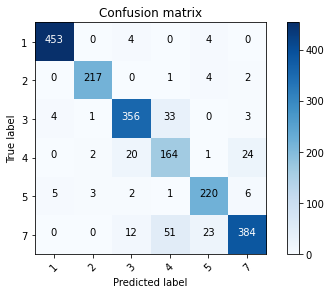


fi_micro average is: 90.0 %
fi_macro average is: 89.0 %


In [52]:
clf = MLPClassifier(hidden_layer_sizes=(50, ))

# Επιλογή Βέλτιστων Παραμέτρων 

# Μετασχηματιστές
n_components = [13]                    

#Υπερπαράμετροι ταξινομητή:
activation=['relu']
solver= ['lbfgs']
max_iter=[300]
learning_rate =['constant']
alpha = [10]

# Βελτιστοποίηση με βάση το f1_macro
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_macro,accuracy_f1_macro = mlp_optimization_bd ('f1_macro',n_components,activation, solver, max_iter, learning_rate, alpha)

if  (len(time_list)==18):
  # Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
  time_list.append(time_f1_macro)

  # Προσθήκη μετρικών στις λίστες μας
  accuracy_list.append(accuracy_f1_macro)


  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

##### **Σχόλια για βελτιστοποίηση MLP με PipeLine και GridSearch**
Η τεχνική που ακολουθήσαμε την για εύρεση των βέλτιστων υπερπαραμέτρων του MLP ήταν top-down. Ξεκινήσαμε λοιπόν με όλα τα στάδια,και σιγά σιγά αφαιρούσαμε αυτά τα οποία δεν επέφεραν βελτίωση στις μετρικές μας f1_micro & f1_macro. Να σημειωθεί οτι ο χρόνος εκτέλεσης για ένα πλήρες GridSearch(στάδια προεπεξεργασίας & παραμτροποίηση ταξινομητή ) ήταν περίπου 9 ώρες (!). 
<br>
<br>Ως προς τα *στάδια προεπεξερασίας* παρατηρήσαμε ότι:
<br>

*    **StandardScaler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Standard Scaler για την κανονικοποίηση των χαρακτηριστικών.

*   **RandomOverSampler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Random Over Sampler για την εξισορρόπηση του μη ισορροπημένου (όπως δείξαμε προηγουμένως) dataset.

*   **vthreshold**: Παρότι το έυρος τιμών των δεδομένων μας ήταν περίπου απο [180 - 520], και δοκίμάσαμε αρκετές τιμές στο διάστημα αυτό αλλά και τη τιμή μηδέν, ο αλγόριθμος gridSearch επιδείκνυε την τιμή μηδεν (Σημαντική παρατήρηση:αν και τοποθετήθηκε σωστά στο πρώτο στάδιο πριν την κανονικοποίηση, αφαιρέθηκε).
*   **PCA**: Tα χαρακτηριστικά μας ήταν 36. Οι τιμές που δοκιμάσαμε ήταν στο διάστημα [10-25]. Απο τη στιγμή που η τιμή που επιλέχτηκε (13) δεν ήταν άκρο του κλειστού αυτού διαστήματος, δεν προχωρήσαμε σε παιρετέρω αναζήτηση.


<br>Ως προς την *παραμετροποίηση* του ταξινομήτη:
*   **activation**: Απο το εξαντλητικό gridSearch που κάναμε στην αρχή, επιλέχτηκε σαν activation function η Relu. Οπότε συνεχίσαμε κρατώντας αυτή τη τιμή σταθερή.
*   **solver**: Για τον ίδιο λόγο, κρατήσαμε και σταθερή τη τιμή του 'lbfgs' σαν solver. 
*   **max_iter**: Απο το αρχικό "πλήρες" GridSearch που κάναμε, είδαμε οτι η τιμή που μας επέδειξε ο αλγόριθμος σαν βέλτιστη ήταν άκρο (300) κλειστού διαστήματος[100-300]. Προχωρώντας σε περαιτέρω αναζήτηση στα δεξιά είδαμε ότι δεν μεταβάλλεται η απόδοση, οπότε επαναφέραμε τη τιμή στις 300 επαναλήψεις
*   **learning_rate**:Απο το εξαντλητικό gridSearch που κάναμε στην αρχή, επιλέχτηκε σαν learning_rate η τιμή constant. Οπότε συνεχίσαμε κρατώντας αυτή τη τιμή σταθερή
*   **aplha**: Aρχικά αναζητήσαμε τιμές κοντά στη default (0.0001). Είδαμε όμως ότι χρειάζεται να μεγαλώσουμε τη τιμή του alpha για καλύτερα αποτελέσματα. Απο τη τιμή "1" και μετά το μοντέλο μας εμφάνιζε σταθερή απόδοση. Οπότε την "παγώσαμε"



<br> Ως προς τους *κόμβους του hidden_layer* ακολουθήσαμε και τις **τρείς** θεωρείες που συνοψίζονται στο άρθρο [Heaton Research-The Number of Hidden Layers](https://www.heatonresearch.com/2017/06/01/hidden-layers.html).


1.   Ο αριθμός των νευρώνων του hidden layer, να είναι μεταξύ του μεγέθους του input_layer και του output layer
2.   O αριθμός των νευρώνων του hidden layer να ειναι 2/3 του μεγέθους του input_layer, συν το μέγεθος του output.
3.    O αριθμός των νευρώνων του hidden layer να ειναι μικρότερος απο το διπλάσιο μέγεθος του input layer

Υπενθυμίζονται τα ακόλουθα:

*   **Μέγεθος input layer**: Όσα και τα χαρακτηρίστικά (36 χωρίς PCA, 13 με PCA)
*   **Μέγεθος output layer**:Όσες οι κλάσεις, δηλαδή 6. 



<br> Σεβόμενοι τις παραπάνω θεωρίες λοιπόν, αρχίσαμε με 6 κόμβους στο hidden layer.Το αποτέλεσμα ήταν περίπου 86% (f1-micro) και 88 %(f1-macro). Στην συνέχεια αυξάνοντας τον αριθμό των nodes σε 15, παρατηρήσαμε άνοδο (89,88 % για micro macro αντίστοιχα). Αυξάνοντας συνέχεια τον αριθμό των κόμβων, παρατηρήσαμε ότι για 50 δεν είχαμε περαιτέρω αύξηση 90,89 % για micro macro αντίστοιχα. Οπότε αυτή η τιμή επιλέχτηκε σαν βέλτιστη.









#### SVM

##### Linear Kernel

In [53]:
# Συνάρτηση βελτιστoπoίησης SVM (Linear Kernel) μέσω Grid Search και επιστροφή μετρικών με βάση μετρική απόδοσης (micro or macro)

def svm_linear_optimization_bd (score,n_components,loss,tol,C):
  
  # Αρχικοποίηση Pipeline και GridSearch Estimator
  pipe = Pipeline(steps=[('scaler', scaler), 
                         ('sampler', ros), 
                         ('pca', pca), 
                         ('LinSVC', clf)], memory = 'tmp')
  
  estimator = GridSearchCV(pipe, dict(pca__n_components=n_components,
                                      LinSVC__loss = loss,
                                      LinSVC__tol=tol,
                                      LinSVC__C=C), cv=5, scoring=score, n_jobs=-1)
  
  # Έναρξη χρόνου
  start_time = time.time()

  # Κάνουμε fit τον ταξινομητή στο train set και predict στο test set
  estimator.fit(train, train_labels)
  preds = estimator.predict(test)

  # Λήξη χρόνου
  time_f1 = time.time() - start_time

  # Εκτύπωση βέλτιστων υπερ-παραμέτρων
  print(estimator.best_params_)
  print("")

  # Πίνακας σύγχυσης
  cnf_matrix = confusion_matrix(test_labels, preds)
  uni_labels = np.unique(train_labels)
  uni_labels = uni_labels.tolist()
  plot_confusion_matrix(cnf_matrix,uni_labels)
  print("")

  # Εκτύπωση μετρικών
  accuracy = round(100*estimator.score(test, test_labels))

  p_micro,r_micro,f1_micro,_ = precision_recall_fscore_support(test_labels, preds, average='micro')
  p_macro,r_macro,f1_macro,_ = precision_recall_fscore_support(test_labels, preds, average='macro')

  print("fi_micro average is:",round(100*f1_micro),"%")
  print("fi_macro average is:",round(100*f1_macro),"%")

  return (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1,accuracy

{'LinSVC__C': 0.01, 'LinSVC__loss': 'squared_hinge', 'LinSVC__tol': 1e-06, 'pca__n_components': 13}

iii) Confusion matrix, without normalization


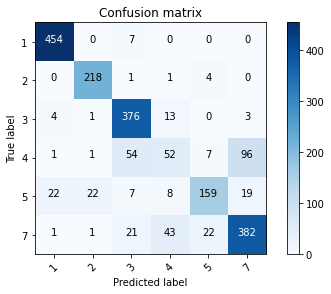


fi_micro average is: 82.0 %
fi_macro average is: 77.0 %


In [ ]:
#@title GridSearch (SVM Linear)
# From scikit-learn: (Prefer dual=False when n_samples > n_features)
clf = LinearSVC(dual=False)

n_components = [11,13,15,17,25,27]                    # Το Πλήθος των Κύριων συνιστωσών PCA που κρατάμε
#Υπερπαράμετροι ταξινομητή:
loss = ['hinge', 'squared_hinge']
tol = [1e-6, 1e-5, 1e-4]
C = [0.005, 0.01, 0.1, 1]

# Βελτιστοποίηση με βάση το f1_micro
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = svm_linear_optimization_bd ('f1_micro',n_components,loss,tol,C)

###### α)f1 micro

{'LinSVC__C': 0.01, 'LinSVC__loss': 'squared_hinge', 'LinSVC__tol': 1e-06, 'pca__n_components': 13}

iii) Confusion matrix, without normalization


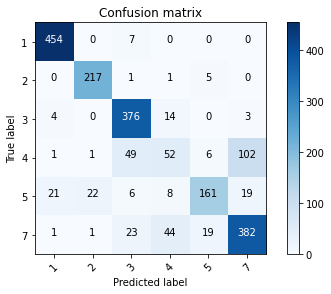


fi_micro average is: 82.0 %
fi_macro average is: 77.0 %


In [54]:
clf = LinearSVC(dual=False)

# Επιλογή Βέλτιστων Παραμέτρων

# Μετασχηματιστές
n_components = [13]

#Υπερπαράμετροι ταξινομητή:
loss = ['squared_hinge']
tol = [1e-6]
C = [0.01]

# Βελτιστοποίηση ταξινομητή και εξαγωγή μετρικών
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = svm_linear_optimization_bd ('f1_micro',n_components,loss,tol,C)

if  (len(time_list)==19):
  # Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
  time_list.append(time_f1_micro)

  # Προσθήκη μετρικών στις λίστες μας
  accuracy_list.append(accuracy_f1_micro)


  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

###### β)f1 macro

{'LinSVC__C': 1, 'LinSVC__loss': 'squared_hinge', 'LinSVC__tol': 1e-06, 'pca__n_components': 13}

iii) Confusion matrix, without normalization


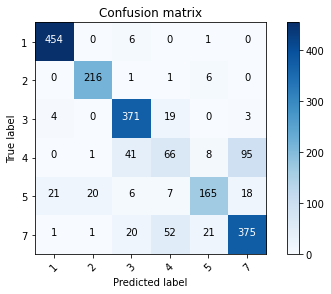


fi_micro average is: 82.0 %
fi_macro average is: 78.0 %


In [55]:
# From scikit-learn: (Prefer dual=False when n_samples > n_features)
clf = LinearSVC(dual=False)

# Επιλογή Βέλτιστων Παραμέτρων

# Μετασχηματιστές
n_components = [13]

#Υπερπαράμετροι ταξινομητή:
loss = ['squared_hinge']
tol = [1e-6]
C = [1]

# Βελτιστοποίηση ταξινομητή και εξαγωγή μετρικών
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_macro,accuracy_f1_macro = svm_linear_optimization_bd ('f1_macro',n_components,loss,tol,C)

if  (len(time_list)==20):
  # Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
  time_list.append(time_f1_macro)

  # Προσθήκη μετρικών στις λίστες μας
  accuracy_list.append(accuracy_f1_macro)


  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

###### **Σχόλια για βελτιστοποίηση SVM (Linear Kernel) με PipeLine και GridSearch**

Η τεχνική που ακολουθήσαμε την για εύρεση των βέλτιστων υπερπαραμέτρων του SVM (Linear Kernel) ήταν top-down. Ξεκινήσαμε λοιπόν με όλα τα στάδια,και σιγά σιγά αφαιρούσαμε αυτά τα οποία δεν επέφεραν βελτίωση στις μετρικές μας f1_micro & f1_macro. Να σημειωθεί οτι ο χρόνος εκτέλεσης για ένα πλήρες GridSearch(στάδια προεπεξεργασίας & παραμτροποίηση ταξινομητή ) ήταν μόλις 25 δευτερόλεπτα. 
<br>
<br>Ως προς τα *στάδια προεπεξερασίας* παρατηρήσαμε ότι:
<br>

*    **StandardScaler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Standard Scaler για την κανονικοποίηση των χαρακτηριστικών.

*   **RandomOverSampler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Random Over Sampler για την εξισορρόπηση του μη ισορροπημένου (όπως δείξαμε προηγουμένως) dataset.

*   **vthreshold**: Παρότι το έυρος τιμών των δεδομένων μας ήταν περίπου απο [180 - 520], και δοκίμάσαμε αρκετές τιμές στο διάστημα αυτό αλλά και τη τιμή μηδέν, ο αλγόριθμος gridSearch επιδείκνυε την τιμή μηδεν (Σημαντική παρατήρηση:αν και τοποθετήθηκε σωστά στο πρώτο στάδιο πριν την κανονικοποίηση, αφαιρέθηκε).
*   **PCA**: Tα χαρακτηριστικά μας ήταν 36. Οι τιμές που δοκιμάσαμε ήταν στο διάστημα [10-25]. Απο τη στιγμή που η τιμή που επιλέχτηκε (13) δεν ήταν άκρο του κλειστού αυτού διαστήματος, δεν προχωρήσαμε σε παιρετέρω αναζήτηση.


<br>Ως προς την *παραμετροποίηση* του ταξινομήτη:


*   **loss** : Έγινε αντιληπτό οτι δοκιμάζοντας και τις δυο περιπτώσεις 'hinge', 'squared_hinge' σαν loss-function, μεγαλύτερη απόδοση επιτευχθηκε ορίζοντας squared_hinge.
*   **tol** : Αρχικά παρατηρήθηκε ότι όσο μειώναμε την τιμή της παραμέτρου tol, τόσο αυξάνονταν ο χρόνος εκτέλεσης του GridSearch. Η τιμή της ανοχής που επιλεγόταν κάθε φορά απο τον αλγόριθμο, ήταν άκρο (αριστερό) του κλειστού διαστήματος, με το οποίο πειραματιζόμασταν.Οπότε συνεχίζαμε την αναζήτηση μας σε ολοένα και μικρότερες τιμές. Απο την τιμή $10^{-6}$ και κάτω δεν παρατηρήσαμε αλλαγή στην απόδοση, οπότε σταματήσαμε την αναζήτηση.
*   **C** : Ξεκινώντας απο τη default τιμή C = 1.0 ,πειραματιστήκαμε με τιμές μικρότερες αλλά θετικές(C = παράμετρος κανονικοποιήσης).Όσο μειώνόταν η τιμή αυτή, τόσο αυξανόταν η απόδοση. Για τιμές όμως μικρότρες από 0.01 δεν παρατητήσαμε αύξηση.

***Σημαντική Σημείωση***: Η απόδοση του συγκεκριμένου classifier, δεν άγγιξε επιθυμητές τιμές αλλά περιορίστηκε περίπου στο 82%. Κάτι τέτοιο αφενός σηματοδότησε ότι τα δείγματα μας δύσκολα διαχωρίζονται **γραμμικά**, αφετέρου οτι θα πρέπει να πειραματιστούμε και με άλλους πυρήνες.





##### Poly Kernel

In [56]:
# Συνάρτηση βελτιστoπoίησης SVM (Poly Kernel) μέσω Grid Search και επιστροφή μετρικών με βάση μετρική απόδοσης (micro or macro)

def svm_poly_optimization_bd (score,n_components,C,degree, gamma, tol):
  pipe = Pipeline(steps=[('scaler', scaler), 
                         ('pca', pca), 
                         ('PolySVC', clf)], memory = 'tmp')
  
  estimator = GridSearchCV(pipe, dict(pca__n_components=n_components,
                                      PolySVC__C = C, 
                                      PolySVC__degree=degree, 
                                      PolySVC__gamma=gamma,
                                      PolySVC__tol= tol ), cv=5, scoring=score, n_jobs=-1)

  # Έναρξη χρόνου
  start_time = time.time()

  # Κάνουμε fit τον ταξινομητή στο train set και predict στο test set
  estimator.fit(train, train_labels)
  preds = estimator.predict(test)

  # Λήξη χρόνου
  time_f1 = time.time() - start_time

  # Εκτύπωση βέλτιστων υπερ-παραμέτρων
  print(estimator.best_params_)
  print("")

  # Πίνακας σύγχυσης
  cnf_matrix = confusion_matrix(test_labels, preds)
  uni_labels = np.unique(train_labels)
  uni_labels = uni_labels.tolist()
  plot_confusion_matrix(cnf_matrix,uni_labels)
  print("")
  
  # Εκτύπωση μετρικών
  accuracy = round(100*estimator.score(test, test_labels))

  p_micro,r_micro,f1_micro,_ = precision_recall_fscore_support(test_labels, preds, average='micro')
  p_macro,r_macro,f1_macro,_ = precision_recall_fscore_support(test_labels, preds, average='macro')

  print("fi_micro average is:",round(100*f1_micro),"%")
  print("fi_macro average is:",round(100*f1_macro),"%")

  return (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1,accuracy

{'PolySVC__C': 4, 'PolySVC__degree': 3, 'PolySVC__gamma': 'auto', 'PolySVC__tol': 1e-06, 'pca__n_components': 15}

iii) Confusion matrix, without normalization


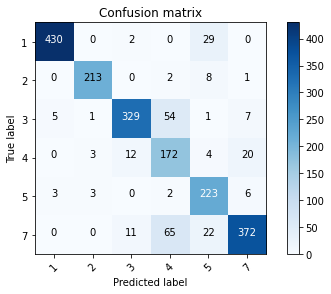


fi_micro average is: 87.0 %
fi_macro average is: 86.0 %


In [ ]:
#@title GridSearch (SVM Poly)

clf = SVC(kernel='poly')

#Μείωση Διαστατικότητας
n_components = [10,13,15,17,25]                    # Το Πλήθος των Κύριων συνιστωσών PCA που κρατάμε

#Υπερπαράμετροι ταξινομητή:
C = [1,2,3,4,5]
degree = [2,3,4,9]
gamma = ['scale','auto']
tol = [1e-6,1e-5,1e-4]

# Βελτιστοποίηση με βάση το f1_micro
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = svm_poly_optimization_bd ('f1_micro',n_components,C,degree, gamma, tol)

###### α)f1 micro

{'PolySVC__C': 5, 'PolySVC__degree': 3, 'PolySVC__gamma': 'auto', 'PolySVC__tol': 1e-06, 'pca__n_components': 15}

iii) Confusion matrix, without normalization


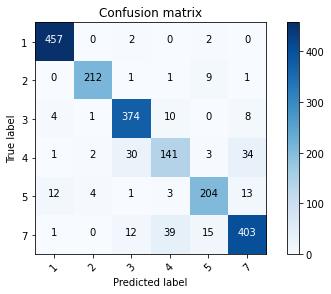


fi_micro average is: 90.0 %
fi_macro average is: 88.0 %


In [57]:
clf = SVC(kernel='poly')

# Επιλογή Βέλτιστων Παραμέτρων 

# Μετασχηματιστές
n_components = [15]

#Υπερπαράμετροι ταξινομητή:
C = [5]
degree = [3]
gamma = ['auto']
tol = [1e-6]

# Βελτιστοποίηση ταξινομητή και εξαγωγή μετρικών
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = svm_poly_optimization_bd ('f1_micro',n_components,C,degree, gamma, tol)

if  (len(time_list)==21):
  # Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
  time_list.append(time_f1_micro)

  # Προσθήκη μετρικών στις λίστες μας
  accuracy_list.append(accuracy_f1_micro)


  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

###### β)f1 macro

{'PolySVC__C': 5, 'PolySVC__degree': 3, 'PolySVC__gamma': 'auto', 'PolySVC__tol': 1e-06, 'pca__n_components': 15}

iii) Confusion matrix, without normalization


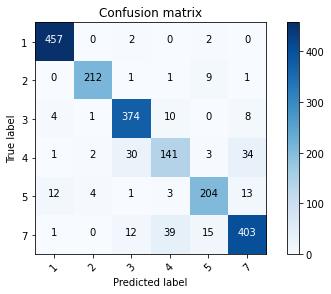


fi_micro average is: 90.0 %
fi_macro average is: 88.0 %


In [58]:
clf = SVC(kernel='poly')

# Επιλογή Βέλτιστων Παραμέτρων 

# Μετασχηματιστές
n_components = [15]

#Υπερπαράμετροι ταξινομητή:
C = [5]
degree = [3]
gamma = ['auto']
tol = [1e-6]

# Βελτιστοποίηση ταξινομητή και εξαγωγή μετρικών
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_macro,accuracy_f1_macro = svm_poly_optimization_bd ('f1_macro',n_components,C,degree, gamma, tol)

if  (len(time_list)==22):
  # Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
  time_list.append(time_f1_macro)

  # Προσθήκη μετρικών στις λίστες μας
  accuracy_list.append(accuracy_f1_macro)


  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

###### **Σχόλια για βελτιστοποίηση SVM (Poly Kernel) με PipeLine και GridSearch**

Η τεχνική που ακολουθήσαμε την για εύρεση των βέλτιστων υπερπαραμέτρων του SVM (Polynomial Kernel) ήταν top-down. Ξεκινήσαμε λοιπόν με όλα τα στάδια,και σιγά σιγά αφαιρούσαμε αυτά τα οποία δεν επέφεραν βελτίωση στις μετρικές μας f1_micro & f1_macro. Να σημειωθεί οτι ο χρόνος εκτέλεσης για ένα πλήρες GridSearch(στάδια προεπεξεργασίας & παραμτροποίηση ταξινομητή ) ήταν μόλις 20 λεπτά. 
<br>
<br>Ως προς τα *στάδια προεπεξερασίας* παρατηρήσαμε ότι:
<br>

*    **StandardScaler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Standard Scaler για την κανονικοποίηση των χαρακτηριστικών.

*   **vthreshold**: Παρότι το έυρος τιμών των δεδομένων μας ήταν περίπου απο [180 - 520], και δοκίμάσαμε αρκετές τιμές στο διάστημα αυτό αλλά και τη τιμή μηδέν, ο αλγόριθμος gridSearch επιδείκνυε την τιμή μηδεν (Σημαντική παρατήρηση:αν και τοποθετήθηκε σωστά στο πρώτο στάδιο πριν την κανονικοποίηση, αφαιρέθηκε).
*   **PCA**: Tα χαρακτηριστικά μας ήταν 36. Οι τιμές που δοκιμάσαμε ήταν στο διάστημα [10-25]. Απο τη στιγμή που η τιμή που επιλέχτηκε (15) δεν ήταν άκρο του κλειστού αυτού διαστήματος, δεν προχωρήσαμε σε παιρετέρω αναζήτηση.


<br>Ως προς την *παραμετροποίηση* του ταξινομήτη:


*   **degree** : Οι τιμές του βαθμόυ του πολυωνύμου με τις οποίες πειραματιστήκαμε ήταν κοντά στη default (2,3,4) και μια μεγαλύτερη (9).Όπως γνωρίζουμε, για μικρές τιμές του πολυωνύμου έχουμε high-bias αλλά low variance. Το αντίθετο ισχύει για μεγάλες τιμές, όπως 9. Η τιμή που επιλέχτηκε ήταν κάπου ενδιάμεσα (τιμή 3)
*   **gamma** : Έγινε αντιληπτό οτι δοκιμάζοντας και τις δυο περιπτώσεις 'auto', 'scale' μεγαλύτερη απόδοση επιτευχθηκε ορίζοντας 'auto' σαν gamma. Στην συνέχεια πειραματιστήκαμε και με άλλες float τιμές χωρίς όμως να μεταβάλλεται η απόδοση ανοδικά.
*   **tol** : Αρχικά παρατηρήθηκε ότι όσο μειώναμε την τιμή της παραμέτρου tol, τόσο αυξάνονταν ο χρόνος εκτέλεσης του GridSearch. Η τιμή της ανοχής που επιλεγόταν κάθε φορά απο τον αλγόριθμο, ήταν άκρο (αριστερό) του κλειστού διαστήματος, με το οποίο πειραματιζόμασταν.Οπότε συνεχίζαμε την αναζήτηση μας σε ολοένα και μικρότερες τιμές. Απο την τιμή $10^-6$ και κάτω δεν παρατηρήσαμε αλλαγή στην απόδοση, οπότε σταματήσαμε την αναζήτηση.
*   **C** : Ξεκινώντας απο τη default τιμή C = 1.0 ,πειραματιστήκαμε με τιμές μεγαλύτερες αλλά θετικές(C = παράμετρος κανονικοποιήσης).Όσο αυξάνοταν η τιμή αυτή, τόσο αυξανόταν η απόδοση. Για τιμές όμως μεγαλύτερες από 4 δεν παρατητήσαμε περαιτέρω αύξηση.

***Σημαντική Σημείωση***: Η απόδοση του Polynomial_Svm classifier, ήταν συγκριτικά καλύτερη απο την αντίστοιχή του Linear κατά 7% (περίπου). Λογικό, αν λάβει κανείς υπόψιν τη δυσκολία του Linear να διαχωρίσει γραμμικά τα δείγματα Βέβαια χρειάστηκε περισσότερος χρόνος για εκπαίδευση - GridSearch χρησιμοποιώντας polynomial kernel, αλλά τα αποτελέσματα ήταν πιο ικανοποιητικά. 



##### Rbf Kernel

In [59]:
# Συνάρτηση βελτιστoπoίησης SVM (Rbf Kernel) μέσω Grid Search και επιστροφή μετρικών με βάση μετρική απόδοσης (micro or macro)

def svm_rbf_optimization_bd (score,n_components,C, gamma, tol):
  
  # Αρχικοποίηση Pipeline και GridSearch Estimator
  pipe = Pipeline(steps=[('scaler', scaler),
                         ('sampler', ros), 
                         ('pca', pca), 
                         ('RbfSVC', clf)], memory = 'tmp')
  

  estimator = GridSearchCV(pipe, dict(pca__n_components=n_components,
                                      RbfSVC__C = C, 
                                      RbfSVC__gamma=gamma,
                                      RbfSVC__tol= tol ), cv=5, scoring=score, n_jobs=-1)
  # Έναρξη χρόνου
  start_time = time.time()

  # Κάνουμε fit τον ταξινομητή στο train set και predict στο test set
  estimator.fit(train, train_labels)
  preds = estimator.predict(test)

  # Λήξη χρόνου
  time_f1 = time.time() - start_time

  # Εκτύπωση βέλτιστων υπερ-παραμέτρων
  print(estimator.best_params_)
  print("")

  # Πίνακας σύγχυσης
  cnf_matrix = confusion_matrix(test_labels, preds)
  uni_labels = np.unique(train_labels)
  uni_labels = uni_labels.tolist()
  plot_confusion_matrix(cnf_matrix,uni_labels)
  print("")
  
  # Εκτύπωση μετρικών
  accuracy = round(100*estimator.score(test, test_labels))

  p_micro,r_micro,f1_micro,_ = precision_recall_fscore_support(test_labels, preds, average='micro')
  p_macro,r_macro,f1_macro,_ = precision_recall_fscore_support(test_labels, preds, average='macro')

  print("fi_micro average is:",round(100*f1_micro),"%")
  print("fi_macro average is:",round(100*f1_macro),"%")

  return (p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1,accuracy

{'RbfSVC__C': 2, 'RbfSVC__gamma': 'scale', 'RbfSVC__tol': 1e-07, 'pca__n_components': 13}

iii) Confusion matrix, without normalization


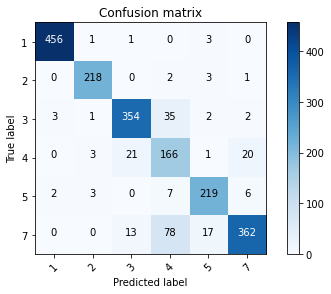


fi_micro average is: 89.0 %
fi_macro average is: 88.0 %


In [ ]:
#@title GridSearch (SVM Rbf)
clf = SVC(kernel='rbf', decision_function_shape='ovo')

#Μείωση Διαστατικότητας
n_components = [9,11,13,15,25]                    # Το Πλήθος των Κύριων συνιστωσών PCA που κρατάμε

#Υπερπαράμετροι ταξινομητή:
C = [1,2,3,8]
gamma = ['scale','auto']
tol = [1e-7,1e-6,1e-5]

# Βελτιστοποίηση με βάση το f1_micro
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = svm_rbf_optimization_bd ('f1_micro',n_components,C, gamma, tol)

###### α)f1 micro

{'RbfSVC__C': 2, 'RbfSVC__gamma': 'scale', 'RbfSVC__tol': 1e-07, 'pca__n_components': 13}

iii) Confusion matrix, without normalization


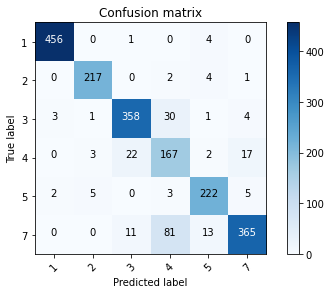


fi_micro average is: 89.0 %
fi_macro average is: 88.0 %


In [60]:
clf = SVC(kernel='rbf', decision_function_shape='ovo')

# Επιλογή Βέλτιστων Παραμέτρων 

# Μετασχηματιστές
n_components = [13]

#Υπερπαράμετροι ταξινομητή:
C = [2]
gamma = ['scale']
tol = [1e-7]

# Βελτιστοποίηση ταξινομητή και εξαγωγή μετρικών
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_micro,accuracy_f1_micro = svm_rbf_optimization_bd ('f1_micro',n_components,C, gamma, tol)

if  (len(time_list)==23):
  # Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
  time_list.append(time_f1_micro)

  # Προσθήκη μετρικών στις λίστες μας
  accuracy_list.append(accuracy_f1_micro)


  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

###### β)f1 macro

{'RbfSVC__C': 2, 'RbfSVC__gamma': 'scale', 'RbfSVC__tol': 1e-07, 'pca__n_components': 13}

iii) Confusion matrix, without normalization


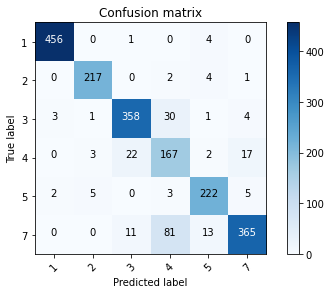


fi_micro average is: 89.0 %
fi_macro average is: 88.0 %


In [61]:
clf = SVC(kernel='rbf', decision_function_shape='ovo')

# Επιλογή Βέλτιστων Παραμέτρων 

# Μετασχηματιστές
n_components = [13]

#Υπερπαράμετροι ταξινομητή:
C = [2]
gamma = ['scale']
tol = [1e-7]

# Βελτιστοποίηση ταξινομητή και εξαγωγή μετρικών
(p_micro,r_micro,f1_micro),(p_macro,r_macro,f1_macro),time_f1_macro,accuracy_f1_macro = svm_rbf_optimization_bd ('f1_macro',n_components,C, gamma, tol)

if  (len(time_list)==24):
  # Προσθήκη χρόνου βελτιστοποίσης στη λίστα μας
  time_list.append(time_f1_macro)

  # Προσθήκη μετρικών στις λίστες μας
  accuracy_list.append(accuracy_f1_macro)


  p_micro_list.append(p_micro)
  r_micro_list.append(r_micro)
  f1_micro_list.append(f1_micro)


  p_macro_list.append(p_macro)
  r_macro_list.append(r_macro)
  f1_macro_list.append(f1_macro)

###### **Σχόλια για βελτιστοποίηση SVM (Rbf Kernel) με PipeLine και GridSearch**

Η τεχνική που ακολουθήσαμε την για εύρεση των βέλτιστων υπερπαραμέτρων του SVM (Rbf Kernel) ήταν top-down. Ξεκινήσαμε λοιπόν με όλα τα στάδια,και σιγά σιγά αφαιρούσαμε αυτά τα οποία δεν επέφεραν βελτίωση στις μετρικές μας f1_micro & f1_macro. Να σημειωθεί οτι ο χρόνος εκτέλεσης για ένα πλήρες GridSearch(στάδια προεπεξεργασίας & παραμτροποίηση ταξινομητή ) ήταν μόλις 1,5 λεπτό. 
<br>
<br>Ως προς τα *στάδια προεπεξερασίας* παρατηρήσαμε ότι:
<br>

*    **StandardScaler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Standard Scaler για την κανονικοποίηση των χαρακτηριστικών.

*   **RandomOverSampler**: Τοποθετήσαμε στο pipeline τον μετασχηματιστή Random Over Sampler για την εξισορρόπηση του μη ισορροπημένου (όπως δείξαμε προηγουμένως) dataset.

*   **vthreshold**: Παρότι το έυρος τιμών των δεδομένων μας ήταν περίπου απο [180 - 520], και δοκίμάσαμε αρκετές τιμές στο διάστημα αυτό αλλά και τη τιμή μηδέν, ο αλγόριθμος gridSearch επιδείκνυε την τιμή μηδεν (Σημαντική παρατήρηση:αν και τοποθετήθηκε σωστά στο πρώτο στάδιο πριν την κανονικοποίηση, αφαιρέθηκε).
*   **PCA**: Tα χαρακτηριστικά μας ήταν 36. Οι τιμές που δοκιμάσαμε ήταν στο διάστημα [10-25]. Απο τη στιγμή που η τιμή που επιλέχτηκε (15) δεν ήταν άκρο του κλειστού αυτού διαστήματος, δεν προχωρήσαμε σε παιρετέρω αναζήτηση.


<br>Ως προς την *παραμετροποίηση* του ταξινομήτη:


*   **gamma** : Έγινε αντιληπτό οτι δοκιμάζοντας και τις δυο περιπτώσεις 'auto', 'scale' μεγαλύτερη απόδοση επιτευχθηκε ορίζοντας 'auto' σαν gamma. Στην συνέχεια πειραματιστήκαμε και με άλλες float τιμές χωρίς όμως να μεταβάλλεται η απόδοση ανοδικά.
*   **tol** : Αρχικά παρατηρήθηκε ότι όσο μειώναμε την τιμή της παραμέτρου tol, τόσο αυξάνονταν ο χρόνος εκτέλεσης του GridSearch. Η τιμή της ανοχής που επιλεγόταν κάθε φορά απο τον αλγόριθμο, ήταν άκρο (αριστερό) του κλειστού διαστήματος, με το οποίο πειραματιζόμασταν.Οπότε συνεχίζαμε την αναζήτηση μας σε ολοένα και μικρότερες τιμές. Απο την τιμή $10^-7$ και κάτω δεν παρατηρήσαμε αλλαγή στην απόδοση, οπότε σταματήσαμε την αναζήτηση.
*   **C** : Ξεκινώντας απο τη default τιμή C = 1.0 ,πειραματιστήκαμε με τιμές μεγαλύτερες αλλά θετικές(C = παράμετρος κανονικοποιήσης).Όσο αυξάνοταν η τιμή αυτή, τόσο αυξανόταν η απόδοση. Για τιμές όμως μεγαλύτερες από 2 δεν παρατητήσαμε περαιτέρω αύξηση.

*Σημαντική Σημείωση*: Η απόδοση του RBF_Svm classifier, ήταν συγκριτικά καλύτερη απο την αντίστοιχή του Polynomial κατά 2% (περίπου) και του Linear κατά 9%. Επίσης σημειώσε λιγότερο χρόνο απο Polynomial αλλά περισσότερο απο Linear. Τα παραπάνω τον καθιστούν καταλληλότερο πυρήνα για το συγκεκριμένο classification



### 2 . Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set εκτυπώστε πίνακες με τους χρόνους εκτέλεσης.

In [62]:
# Χρόνοι εκτέλεσης κάθε ταξινομητή ταξινομημένοι σε φθίνουσα σειρά

# Σημείωση: Πρόκειται για τους χρόνους του fit και του predict έχοντας ήδη επιλέξει τις βέλτιστες για κάθε περίπτωση υπερπαραμέτρους.
#           Οι βέλτιστες υπερπαράμετροι βρέθηκαν με GridSearch και χρειάστηκαν αρκετά λέπτα έως και ώρες.
#           Δεν συμπεριλαμβάνουμε εδώ τους χρόνους του GridSearch. Τους αναφέραμε ενδεικτικά στην αρχή του 1ου ερωτήματος της βελτιστοποίησης

df_list = [['dummy uniform','dummy constant_1','dummy constant_2','dummy constant_3','dummy constant_4','dummy constant_5','dummy constant_7','dummy most_frequent','dummy stratified','GNB',
            'kNN baseline','MLP baseline','SVM Linear baseline','SVM Poly baseline','SVM Rbf baseline',
            'kNN optimized by f1_micro','kNN optimized by f1_macro',
            'MLP optimized by f1_micro','MLP optimized by f1_macro',
            'SVM Linear optimized by f1_micro','SVM Linear optimized by f1_macro',
            'SVM Poly optimized by f1_micro','SVM Poly optimized by f1_macro',
            'SVM Rbf optimized by f1_micro','SVM Rbf optimized by f1_macro',],time_list]

df = pd.DataFrame (df_list).transpose()
df.columns = ['Classifiers','Time(s)']

HTML(df.sort_values(by=['Time(s)'],ascending=False).to_html(index=False))

Classifiers,Time(s)
MLP optimized by f1_micro,16.938
MLP optimized by f1_macro,15.3478
MLP baseline,2.76215
SVM Linear baseline,2.37027
SVM Rbf optimized by f1_micro,2.31855
SVM Rbf optimized by f1_macro,2.29694
SVM Poly optimized by f1_micro,1.55566
kNN optimized by f1_micro,1.41969
SVM Poly optimized by f1_macro,1.3037
SVM Poly baseline,1.26303


### 3 . Για κάθε averaged metric, εκτυπώστε bar plot σύγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.

In [63]:
# Αναδιατάσουμε τις λίστες μας που περιέχουν τις μετρικές 
# ώστε οι τιμές των βελτιστοποιημένων ταξιονομητών να είναι 
# μαζί με τις τιμές των αντίστοιχων baseline ταξινομητών
def rearrangement (data_list):
  dummy_list = data_list[0:9]
  gnb_list = data_list[9]
  knn_list = itemgetter(10,15,16)(data_list)
  mlp_list = itemgetter(11,17,18)(data_list)
  svm_lin_list = itemgetter(12,19,20)(data_list)
  svm_poly_list = itemgetter(13,21,22)(data_list)
  svm_rbf_list = itemgetter(14,23,24)(data_list)
  #Aναδιάταξη:
  new_data_list = [*dummy_list , gnb_list, 
                  *knn_list,  *mlp_list, 
                  *svm_lin_list, *svm_poly_list, 
                  *svm_rbf_list]

  return new_data_list

In [64]:
# Νέες αναδιατεταγμένες λίστες
f1_micro_list_new = rearrangement(f1_micro_list)
f1_macro_list_new = rearrangement(f1_macro_list)

p_micro_list_new = rearrangement(p_micro_list)
p_macro_list_new = rearrangement(p_macro_list)

r_micro_list_new = rearrangement(r_micro_list)
r_macro_list_new = rearrangement(r_macro_list)

<Figure size 720x432 with 0 Axes>

<Figure size 576x360 with 0 Axes>

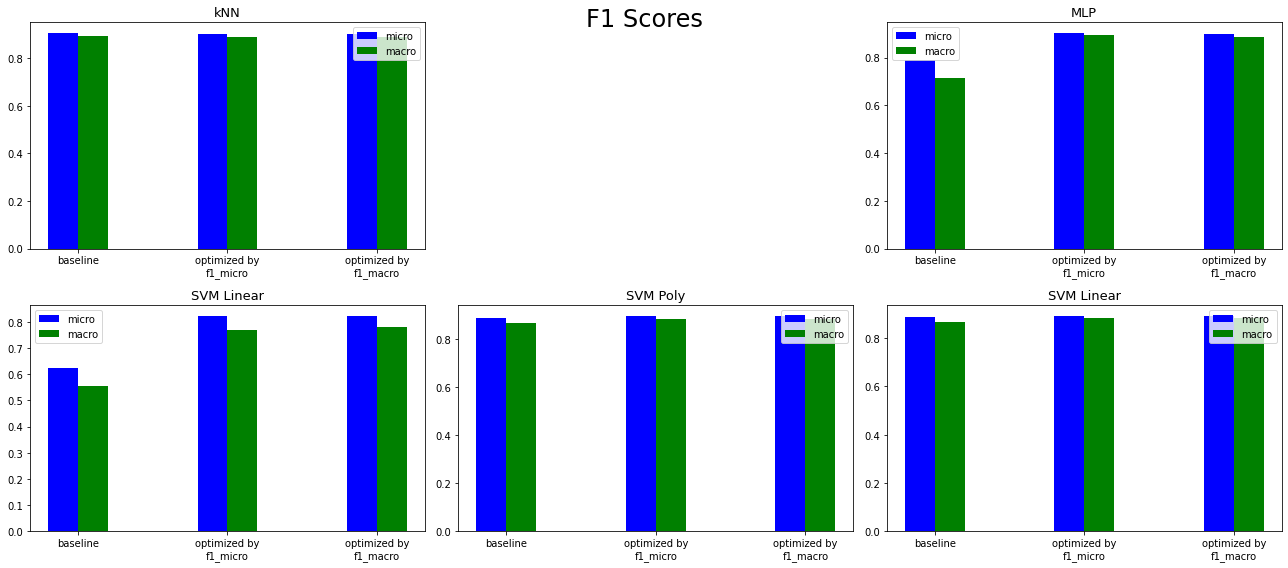

In [65]:
# Γραφήματα για F1 Score
plots_for_classification([f1_micro_list_new[10:13],f1_macro_list_new[10:13],
                                   f1_micro_list_new[13:16],f1_macro_list_new[13:16],
                                   f1_micro_list_new[16:19],f1_macro_list_new[16:19],
                                   f1_micro_list_new[19:22],f1_macro_list_new[19:22],
                                   f1_micro_list_new[22:25],f1_macro_list_new[22:25]],['b', 'g'],'F1 Scores',clf = 'kNN')

<Figure size 720x432 with 0 Axes>

<Figure size 576x360 with 0 Axes>

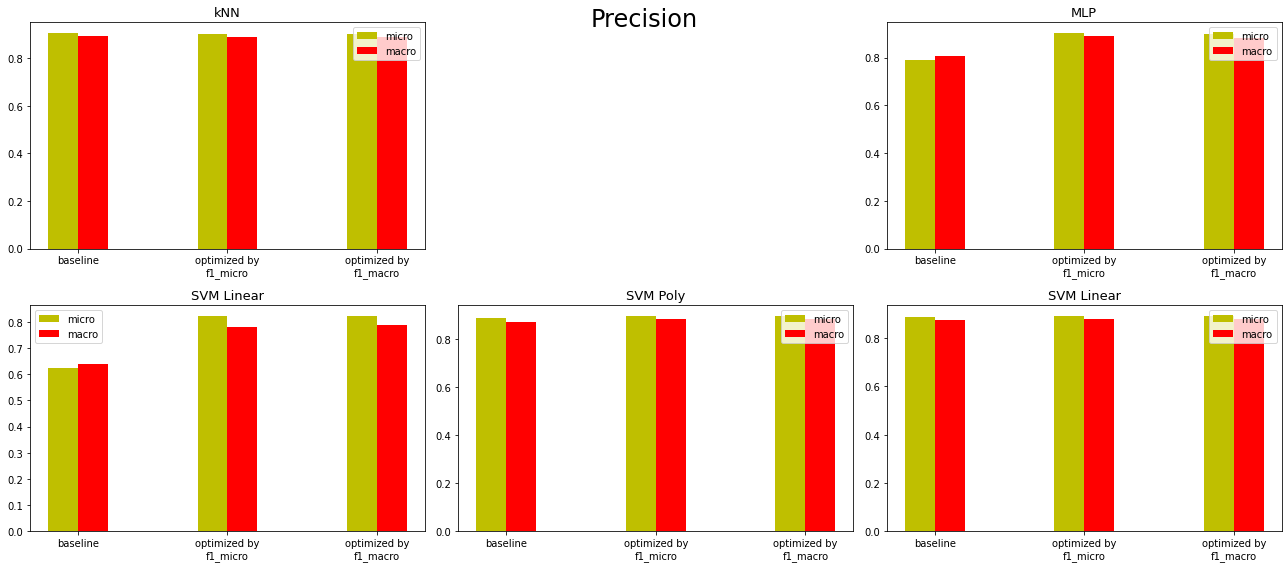

In [66]:
# Γραφήματα για Precision
plots_for_classification([p_micro_list_new[10:13],p_macro_list_new[10:13],
                                   p_micro_list_new[13:16],p_macro_list_new[13:16],
                                   p_micro_list_new[16:19],p_macro_list_new[16:19],
                                   p_micro_list_new[19:22],p_macro_list_new[19:22],
                                   p_micro_list_new[22:25],p_macro_list_new[22:25]],['y', 'r'],'Precision',clf = 'kNN')

<Figure size 720x432 with 0 Axes>

<Figure size 576x360 with 0 Axes>

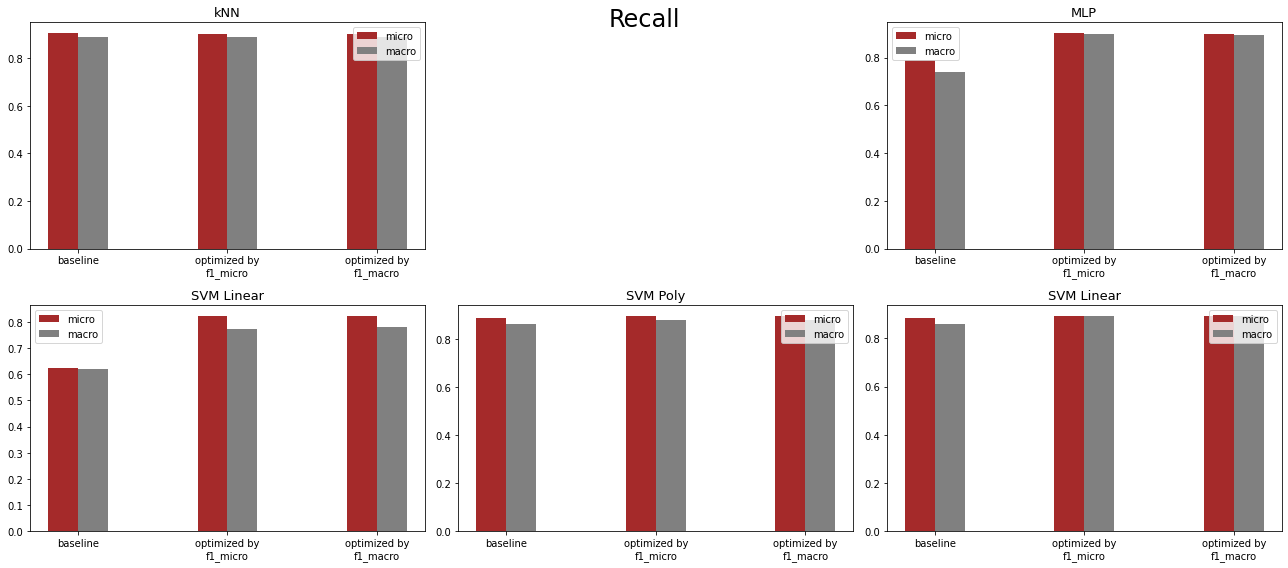

In [67]:
# Γραφήματα για Recall
plots_for_classification([r_micro_list_new[10:13],r_macro_list_new[10:13],
                                   r_micro_list_new[13:16],r_macro_list_new[13:16],
                                   r_micro_list_new[16:19],r_macro_list_new[16:19],
                                   r_micro_list_new[19:22],r_macro_list_new[19:22],
                                   r_micro_list_new[22:25],r_macro_list_new[22:25]],['brown', 'gray'],'Recall',clf = 'kNN')

### 4 . Τυπώστε πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.

In [68]:
baseline_list = accuracy_list[0:15]

optimized_list = ['-','-','-','-','-','-','-','-','-','-']
optimized_list.extend(accuracy_list[15:24:2])

increment_list = ['-','-','-','-','-','-','-','-','-','-']

final = accuracy_list[15:24:2]
first = accuracy_list[10:15] 
increment_list.extend(list(map(sub, final, first)))

df_list = [['dummy uniform','dummy constant_1','dummy constant_2','dummy constant_3','dummy constant_4','dummy constant_5','dummy constant_7','dummy most_freq','dummy stratified','GNB',
            'kNN','MLP','SVM Linear', 'SVM Poly', 'SVM Rbf'], baseline_list, optimized_list, increment_list]

df = pd.DataFrame (df_list).transpose()
df.columns = ['Classifiers','Baseline Accuracy(%)','Optimized Accuracy(%)','Increment(%)']

HTML(df.to_html(index=False))

Classifiers,Baseline Accuracy(%),Optimized Accuracy(%),Increment(%)
dummy uniform,17,-,-
dummy constant_1,23,-,-
dummy constant_2,11,-,-
dummy constant_3,20,-,-
dummy constant_4,11,-,-
dummy constant_5,12,-,-
dummy constant_7,24,-,-
dummy most_freq,23,-,-
dummy stratified,17,-,-
GNB,80,-,-


### 5 . Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης, τη μεταβολή της απόδοσης και τους χρόνους εκτέλεσης.

Στο σημείο αυτό, να σημειωθεί οτι τα διαγράμματα θα αναλυθούν αγνοώντας τους baseline ταξινομητές και τον gnb, οι οποίοι δεν έιχαν παραμέτρους για βελτιστοποίηση. Αλλωστε όλα τα αποτελέσματα για αυτούς αναλύονται στο Μέρος 3 του Baseline Classification. Για τους υπόλοιπους ταξινομητές(kNN, mlp, svm_linear, svm_poly, svm_rbf) ισχύουν τα ακόλουθα:
*   **Precicion,Recall,F1**: Απο τα plοts του ερωτηματος 3,παρατηρεί κανείς ότι, είτε ορίζοντας μοντέλο ως προς *f1_micro* είτε ως προς *f1_macro*, οι παραπάνω τιμές δεν παρουσιάζουν σημαντικές διαφορές.Εξαίρεση αποτελεί ο *svm_linear* classifier, στον οποίο πρόκυψαν αρκετά διαφορετικές τιμές για κάθε μοντέλο (micro-macro). Επίσης αξίζει να σταθεί κανείς στο γεγονός, ότι οι μεγαλύτερες βελτιστοποιήσεις παρατηρούνται για *mlp* classifier και *svm_linear*. 
*   **Πίνακες Σύγχησης:**: Απο τους πίνακες σύγχησης, εξάγουμε το συμπέρασμα ότι τα περισσότερα λάθη  αφορούν το διαχωρισμό δειγμάτων σε κλάση 4 και 7. Πολλά δείγματα που θα έπρεπε να ταξινομηθούν στη κλάση 4 ταξινομούνται στην 7 και το αντίστροφο. Για  τις υπόλοιπες κλάσεις, τα αποτελέσματα είναι αρκετά ικανοποιητικά
*   **Μεταβολή Απόδοσης**:Απο το ερώτημα 4, παρατρούμε οτι τη μεγαλύτερη μεταβολή στην απόδοση σημείωσε ο svm_linear ενώ ακολουθεί ο mlp. Οι υπολοιποι δεν βελτιστοποιήθηκαν αρκετά καθώς σημειώσαν ήδη υψηλό accuracy οι baseline εκδόσεις του Συμβουλευόμενοι και το [paper](https://www.researchgate.net/profile/Soumadip_Ghosh2/publication/262917730_A_Tutorial_on_Different_Classification_Techniques_for_Remotely_Sensed_Imagery_Datasets/links/00b7d539483a9ea8a5000000/A-Tutorial-on-Different-Classification-Techniques-for-Remotely-Sensed-Imagery-Datasets.pdf), παρατηρούμε, οτι (στο ιδιο dataset) o kNN πετυχαίνει f score  89.0% o mlp 89.2%, τη στιγμη που ο svm πετυχαίνει 84.6%. Οι τιμές αυτές είναι ικανοποητικά κοντά σε αυτές που επιτύχαμε με την ανάλυση μας. 
*   **Χρόνοι Εκτέλεσης**: Απο τον πίνακα του ερωτήματος 2 φαίνεται ξεκάθαρα ότι τον περισσότερο χρόνο εκτέλεσης σημείωσε ο mlp και μάλιστα το f1_micro μοντέλο του, ενώ το λιγότερο χρόνο χρειάστηκε ο GNB (αγνοώντας dummy). Ενδιαφερον παρουσιάζει το γεγονός οτι για όλους τους classifiers, το μοντέλο f1_micro χρειάστηκε περισσότερο χρόνο απο ότι το f1_macro.(Μοναδική εξαίρεση αποτελεί ο svm_linear).
<br><br>***Συμπέρασμα***: Η ταξινόμηση εικόνων από το διάστημα είναι ενα ανταγωνιστικό πεδίο για το οποίο γίνονται συνεχώς δοκιμές και ενημερώσεις. Η ανάλυση μας, αναλογιζόμενοι τα ποσοστά επιτυχίας ανταποκρίθηκε ικανοποιητικά στο σκοπό αυτό.